In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = [12, 6]
import warnings
warnings.filterwarnings('ignore')


****
# Data Processing.
****

In [2]:
customers = pd.read_csv('/kaggle/input/quantium/QVI_purchase_behaviour.csv')
chips = pd.read_excel('/kaggle/input/quantium/QVI_transaction_data.xlsx')

In [3]:
customers.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
customers.rename(columns={'PREMIUM_CUSTOMER': 'MEMBERSHIP'}, inplace=True)

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   LYLTY_CARD_NBR  72637 non-null  int64 
 1   LIFESTAGE       72637 non-null  object
 2   MEMBERSHIP      72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


**No Null Values**

In [6]:
customers.duplicated().value_counts()

False    72637
Name: count, dtype: int64

**No Duplicates**

****

In [7]:
chips.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


**Wrong Date Format**

In [8]:
chips['DATE'] = pd.to_datetime(chips['DATE'], origin='1899-12-30', unit='D')
chips.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
chips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


**No Null Values**
****

In [10]:
chips.duplicated().value_counts()

False    264835
True          1
Name: count, dtype: int64

In [11]:
chips[chips.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [12]:
chips[(chips['DATE'] == '2018-10-01') & (chips['PROD_NBR'] == 45)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
78368,2018-10-01,213,213187,213126,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124843,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [13]:
chips.drop_duplicates(inplace=True)
chips[chips.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


**No Duplicated Values**
****

In [14]:
chips['PROD_NAME'].value_counts().to_frame().reset_index()

,PROD_NAME,count
0,Kettle Mozzarella Basil & Pesto 175g,3304
1,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
2,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
3,Tyrrells Crisps Ched & Chives 165g,3268
4,Cobs Popd Sea Salt Chips 110g,3265
...,...,...
109,RRD Pc Sea Salt 165g,1431
110,Woolworths Medium Salsa 300g,1430
111,NCC Sour Cream & Garden Chives 175g,1419
112,French Fries Potato Chips 175g,1418


In [15]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Tokenize the product names and create a list of unique words
product_names = ' '.join(chips['PROD_NAME'])
words = word_tokenize(product_names)
unique_words = pd.DataFrame(set(words), columns=['words'])

In [17]:
# Define keywords related to chips
chip_keywords = ['chip', 'chips']

# Check for words that are not in the chip_keywords list
non_chip_words = unique_words[~unique_words['words'].str.lower().isin(chip_keywords + list(stopwords.words('english')))]

# Display non-chip words
print(non_chip_words)


          words
0       ChpsHny
1         Onion
2         Puffs
3       Natural
4         Waves
..          ...
218       Smith
219    Barbeque
220  Sensations
221   Onion170g
222        170g

[219 rows x 1 columns]


In [18]:
chips = chips[~chips['PROD_NAME'].str.contains("Salsa", case=False, na=False)]

In [19]:
chips.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246741,246741.000000,2.467410e+05,2.467410e+05,246741.000000,246741.000000,246741.000000
mean,2018-12-30 01:19:32.745510656,135.051212,1.355311e+05,1.351312e+05,56.351835,1.908061,7.321328
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756900e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351840e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026540e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787231,8.071542e+04,7.814786e+04,33.695488,0.659832,3.077833


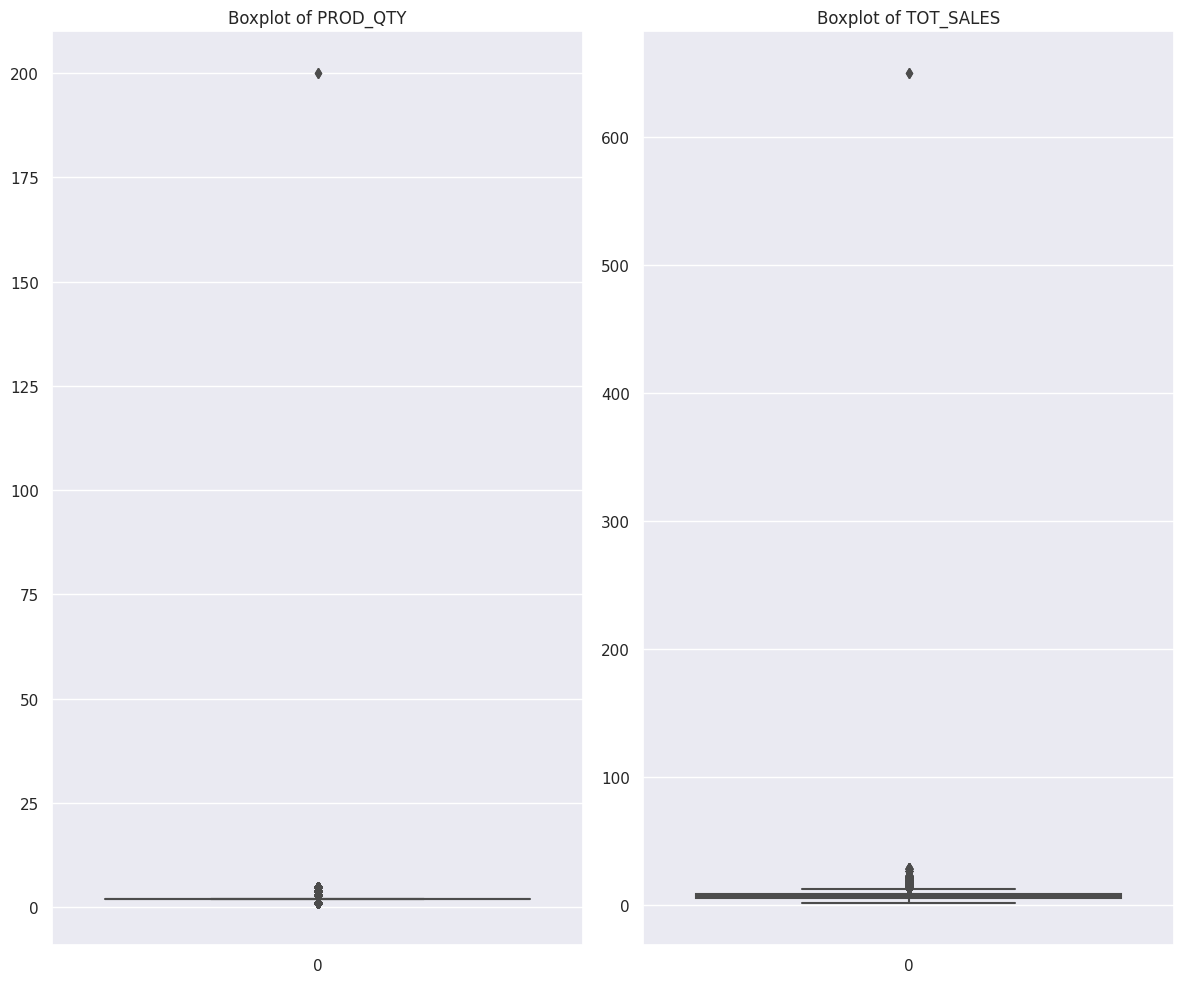

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

sns.boxplot(chips['PROD_QTY'], ax=axes[0])
sns.boxplot(chips['TOT_SALES'], ax=axes[1])

axes[0].set_title('Boxplot of PROD_QTY')
axes[1].set_title('Boxplot of TOT_SALES')

plt.tight_layout()
plt.show()


In [21]:
chips[chips['PROD_QTY']== 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [22]:
chips[chips['LYLTY_CARD_NBR']== 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is
not an ordinary retail customer. The customer might be buying chips for commercial
purposes instead. We'll remove this loyalty card number from further analysis

In [23]:
chips = chips[~(chips['LYLTY_CARD_NBR']== 226000)]
chips[chips['LYLTY_CARD_NBR']== 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [24]:
chips.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246739,246739.000000,2.467390e+05,2.467390e+05,246739.000000,246739.000000,246739.000000
mean,2018-12-30 01:19:29.982856448,135.050474,1.355304e+05,1.351305e+05,56.352259,1.906456,7.316118
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756850e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351820e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030835e+05,2.026525e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.787105,8.071534e+04,7.814774e+04,33.695295,0.342500,2.474901


**Data Is clean from Null, Duplicates, outliers, and wrong data types.**

****
****
# EDA 
****

## CUSTOMERS

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'RETIREES'),
  Text(1, 0, 'OLDER SINGLES/COUPLES'),
  Text(2, 0, 'YOUNG SINGLES/COUPLES'),
  Text(3, 0, 'OLDER FAMILIES'),
  Text(4, 0, 'YOUNG FAMILIES'),
  Text(5, 0, 'MIDAGE SINGLES/COUPLES'),
  Text(6, 0, 'NEW FAMILIES')])

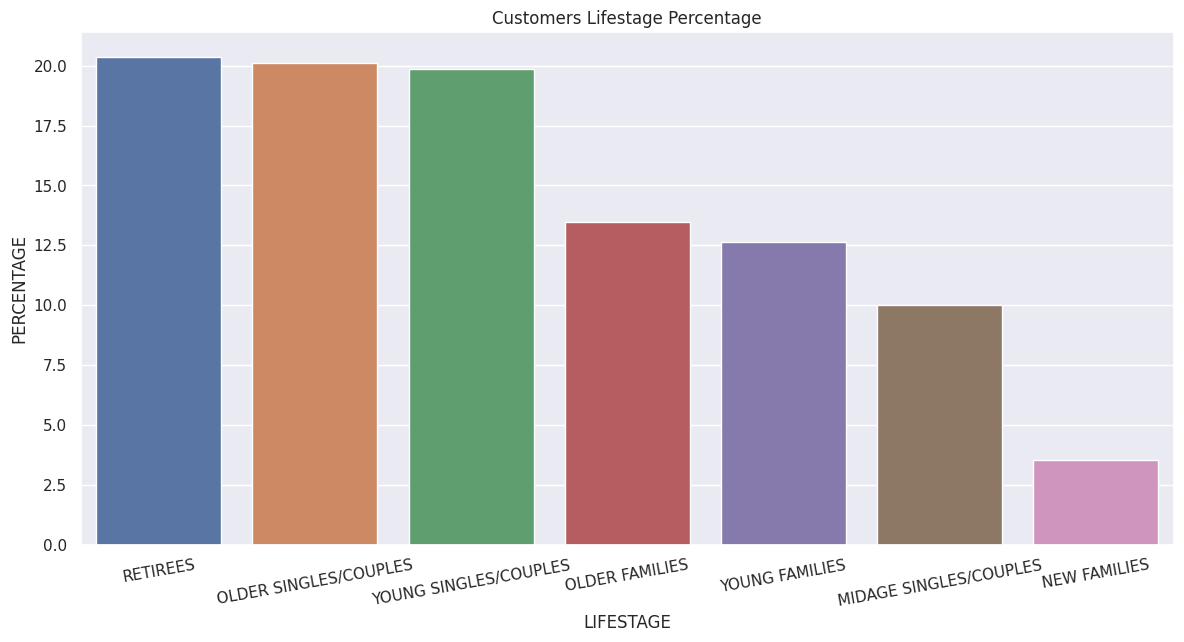

In [25]:
lifestage_counts = customers['LIFESTAGE'].value_counts().reset_index()
lifestage_counts.columns = ['LIFESTAGE', 'COUNT']
lifestage_counts['PERCENTAGE'] = round((lifestage_counts['COUNT']/sum(lifestage_counts['COUNT']))*100,2)
sns.barplot(data=lifestage_counts, x='LIFESTAGE', y='PERCENTAGE',)
plt.tight_layout()
plt.title("Customers Lifestage Percentage")
plt.xticks(rotation=10)


**60% of customers fall in three categories Retirees, Older Singles/Couples, and young singles/couples**

In [26]:
lifestage_counts

,LIFESTAGE,COUNT,PERCENTAGE
0,RETIREES,14805,20.38
1,OLDER SINGLES/COUPLES,14609,20.11
2,YOUNG SINGLES/COUPLES,14441,19.88
3,OLDER FAMILIES,9780,13.46
4,YOUNG FAMILIES,9178,12.64
5,MIDAGE SINGLES/COUPLES,7275,10.02
6,NEW FAMILIES,2549,3.51


****

(array([0, 1, 2]),
 [Text(0, 0, 'Mainstream'), Text(1, 0, 'Budget'), Text(2, 0, 'Premium')])

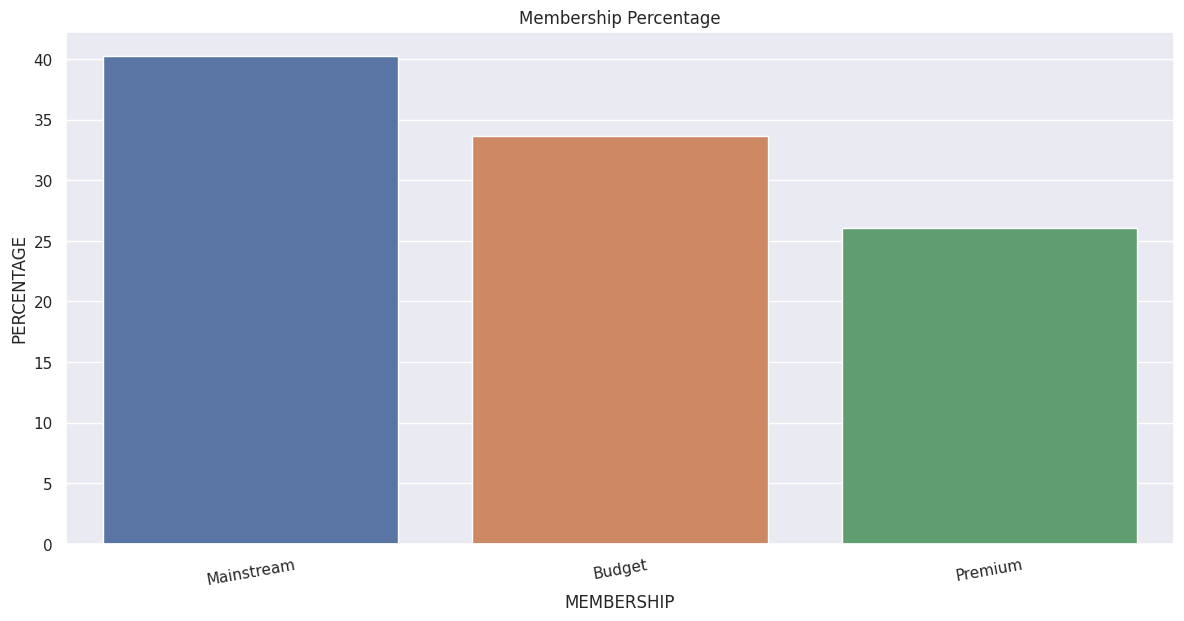

In [27]:
membership_counts = customers['MEMBERSHIP'].value_counts().reset_index()
membership_counts.columns = ['MEMBERSHIP', 'COUNT']
membership_counts['PERCENTAGE'] = round((membership_counts['COUNT']/sum(membership_counts['COUNT']))*100,2)

sns.barplot(data=membership_counts, x='MEMBERSHIP', y='PERCENTAGE',)
plt.tight_layout()
plt.title('Membership Percentage')
plt.xticks(rotation=10)


**40% of memberships are mainstream while only around 28% are premium**

In [28]:
membership_counts

,MEMBERSHIP,COUNT,PERCENTAGE
0,Mainstream,29245,40.26
1,Budget,24470,33.69
2,Premium,18922,26.05


****

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'MIDAGE SINGLES/COUPLES'),
  Text(1, 0, 'NEW FAMILIES'),
  Text(2, 0, 'OLDER FAMILIES'),
  Text(3, 0, 'OLDER SINGLES/COUPLES'),
  Text(4, 0, 'RETIREES'),
  Text(5, 0, 'YOUNG FAMILIES'),
  Text(6, 0, 'YOUNG SINGLES/COUPLES')])

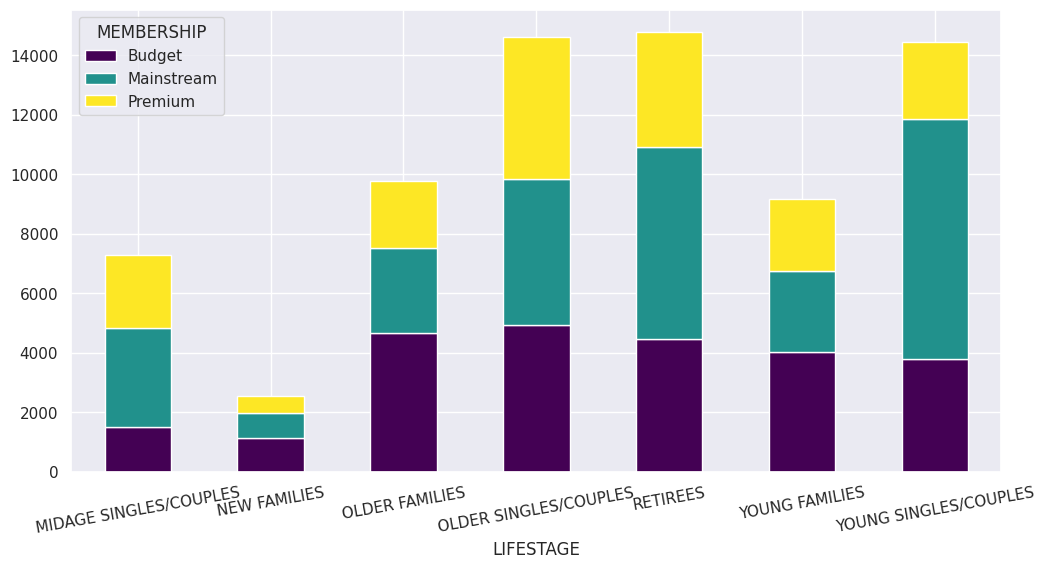

In [29]:
membership_lifestage = customers.groupby(['LIFESTAGE', 'MEMBERSHIP']).size().unstack().fillna(0)
membership_lifestage.plot(kind='bar', stacked=True, colormap='viridis')
plt.xticks(rotation=10)

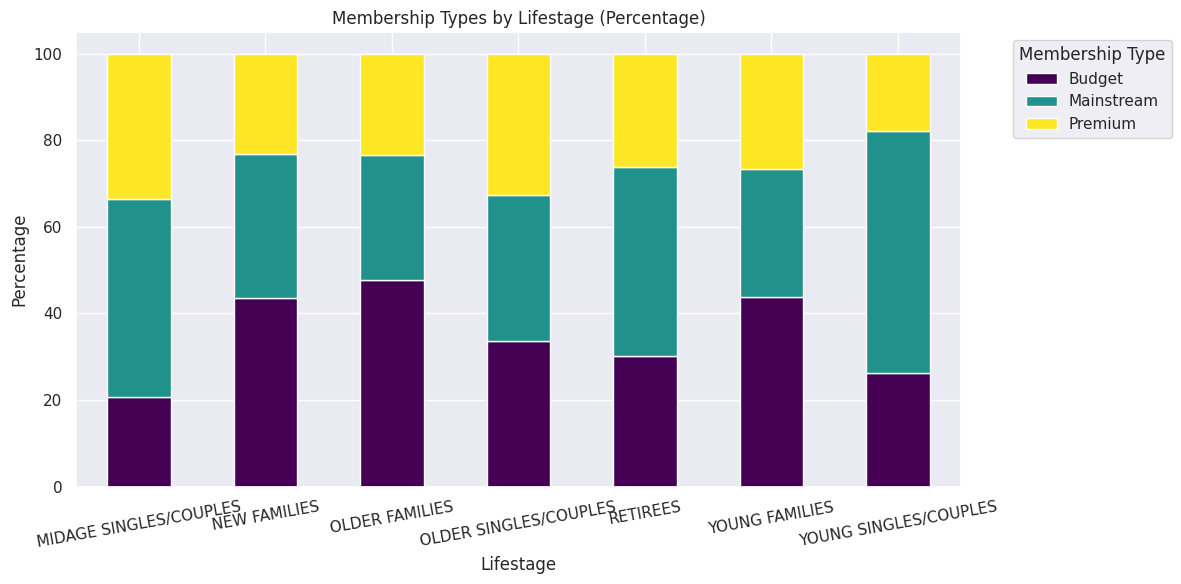

In [30]:
membership_percentages = membership_lifestage.div(membership_lifestage.sum(axis=1), axis=0) * 100
membership_percentages.plot(kind='bar', stacked=True, colormap='viridis')
plt.xticks(rotation=10)

# Add title and labels
plt.title('Membership Types by Lifestage (Percentage)')
plt.xlabel('Lifestage')
plt.ylabel('Percentage')
plt.legend(title='Membership Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [31]:
membership_percentages

MEMBERSHIP,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,20.673540,45.910653,33.415808
NEW FAMILIES,43.624951,33.307179,23.067870
OLDER FAMILIES,47.801636,28.946830,23.251534
OLDER SINGLES/COUPLES,33.739476,33.746321,32.514204
RETIREES,30.084431,43.762242,26.153327
YOUNG FAMILIES,43.767705,29.723251,26.509043
YOUNG SINGLES/COUPLES,26.168548,56.007202,17.824250


****
****

## CHIPS

In [32]:
chips.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [33]:
chips.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246739,246739.000000,2.467390e+05,2.467390e+05,246739.000000,246739.000000,246739.000000
mean,2018-12-30 01:19:29.982856448,135.050474,1.355304e+05,1.351305e+05,56.352259,1.906456,7.316118
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756850e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351820e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030835e+05,2.026525e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.787105,8.071534e+04,7.814774e+04,33.695295,0.342500,2.474901


### Sales

In [34]:
chips['TRANSACTION_VALUE'] = chips['PROD_QTY'] * chips['TOT_SALES']
avg_transaction_value = chips.groupby('TXN_ID')['TRANSACTION_VALUE'].sum().mean()

print(f'Average Transaction Value: {avg_transaction_value}')


Average Transaction Value: 14.4912540009378


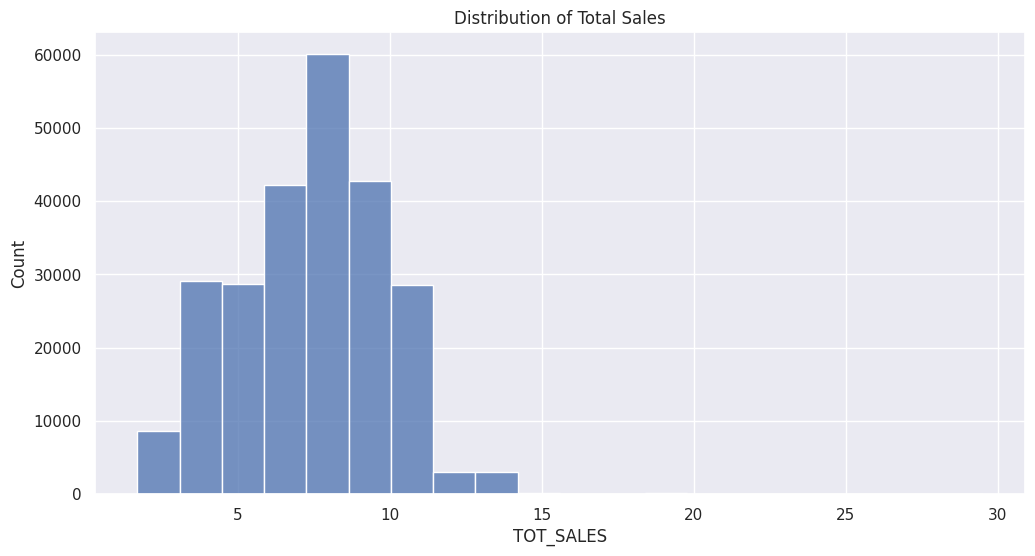

In [35]:
sns.histplot(chips['TOT_SALES'], bins=20)
plt.title('Distribution of Total Sales')
plt.show()

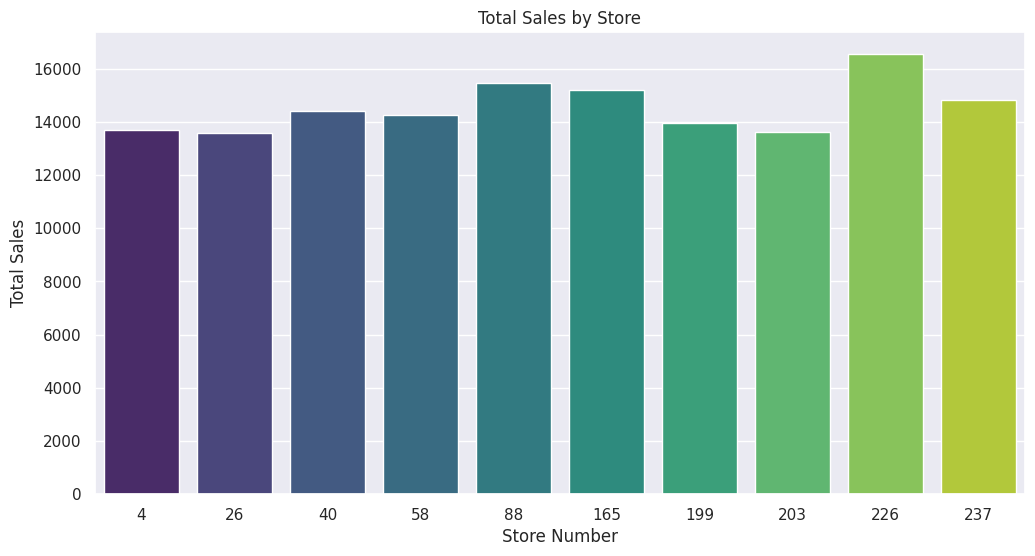

In [36]:
# Total sales by store
sales_by_store = chips.groupby('STORE_NBR')['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES',ascending=False).head(10)
# Plot total sales by store
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_store, x='STORE_NBR', y='TOT_SALES', palette='viridis')
plt.title('Total Sales by Store')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.show()

                                  PROD_NAME  TOT_SALES
0                         Burger Rings 220g     6831.0
1                  CCs Nacho Cheese    175g     5961.9
2                         CCs Original 175g     6048.0
3                  CCs Tasty Cheese    175g     6069.0
4            Cheetos Chs & Bacon Balls 190g     9243.3
..                                      ...        ...
100          WW Original Corn    Chips 200g     5367.5
101          WW Original Stacked Chips 160g     5323.8
102  WW Sour Cream &OnionStacked Chips 160g     5323.8
103     WW Supreme Cheese   Corn Chips 200g     5390.3
104          Woolworths Cheese   Rings 190g     5169.6

[105 rows x 2 columns]


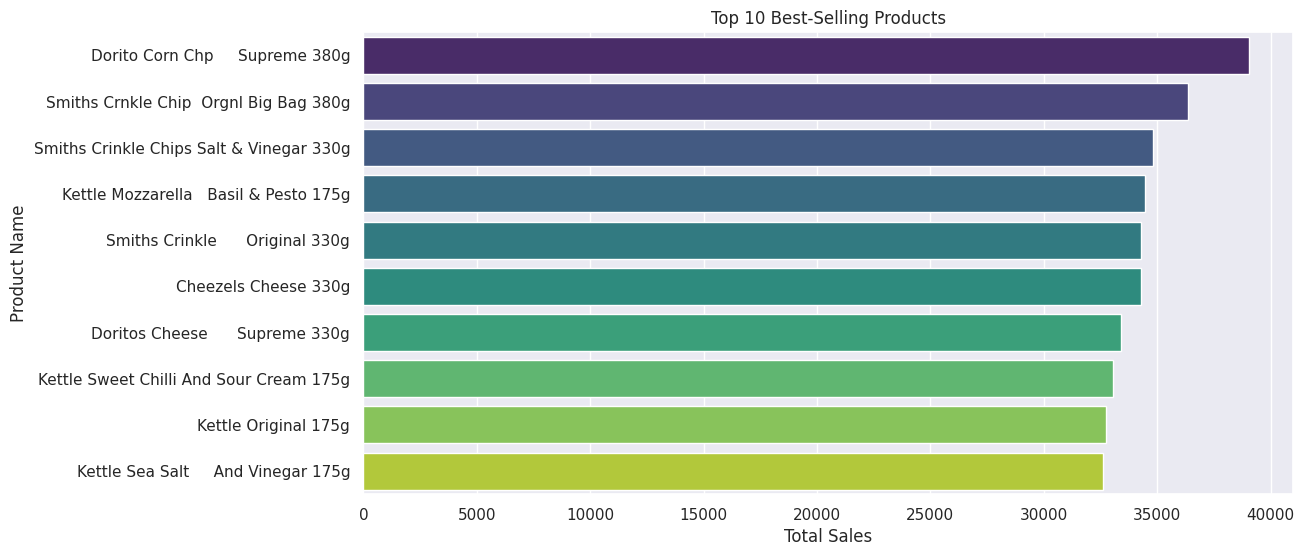

In [37]:
# Total sales by product
sales_by_product = chips.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
print(sales_by_product)

# Plot total sales by product
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_product.sort_values('TOT_SALES', ascending=False).head(10), y='PROD_NAME', x='TOT_SALES', palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.ylabel('Product Name')
plt.xlabel('Total Sales')
plt.show()

In [38]:
import plotly.express as px

In [39]:
# Create a date range
date_range = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')

# Create a DataFrame with the date range
all_dates = pd.DataFrame(date_range, columns=['DATE'])
chips = pd.merge(all_dates, chips, on='DATE', how='left')
chips.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,TRANSACTION_VALUE
count,246740,246739.000000,2.467390e+05,2.467390e+05,246739.000000,246739.000000,246739.000000,246739.000000
mean,2018-12-30 01:19:28.212692992,135.050474,1.355304e+05,1.351305e+05,56.352259,1.906456,7.316118,14.404097
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756850e+04,26.000000,2.000000,5.800000,11.600000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351820e+05,53.000000,2.000000,7.400000,14.800000
75%,2019-03-31 00:00:00,203.000000,2.030835e+05,2.026525e+05,87.000000,2.000000,8.800000,17.600000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,147.500000
std,NaN,76.787105,8.071534e+04,7.814774e+04,33.695295,0.342500,2.474901,6.702265


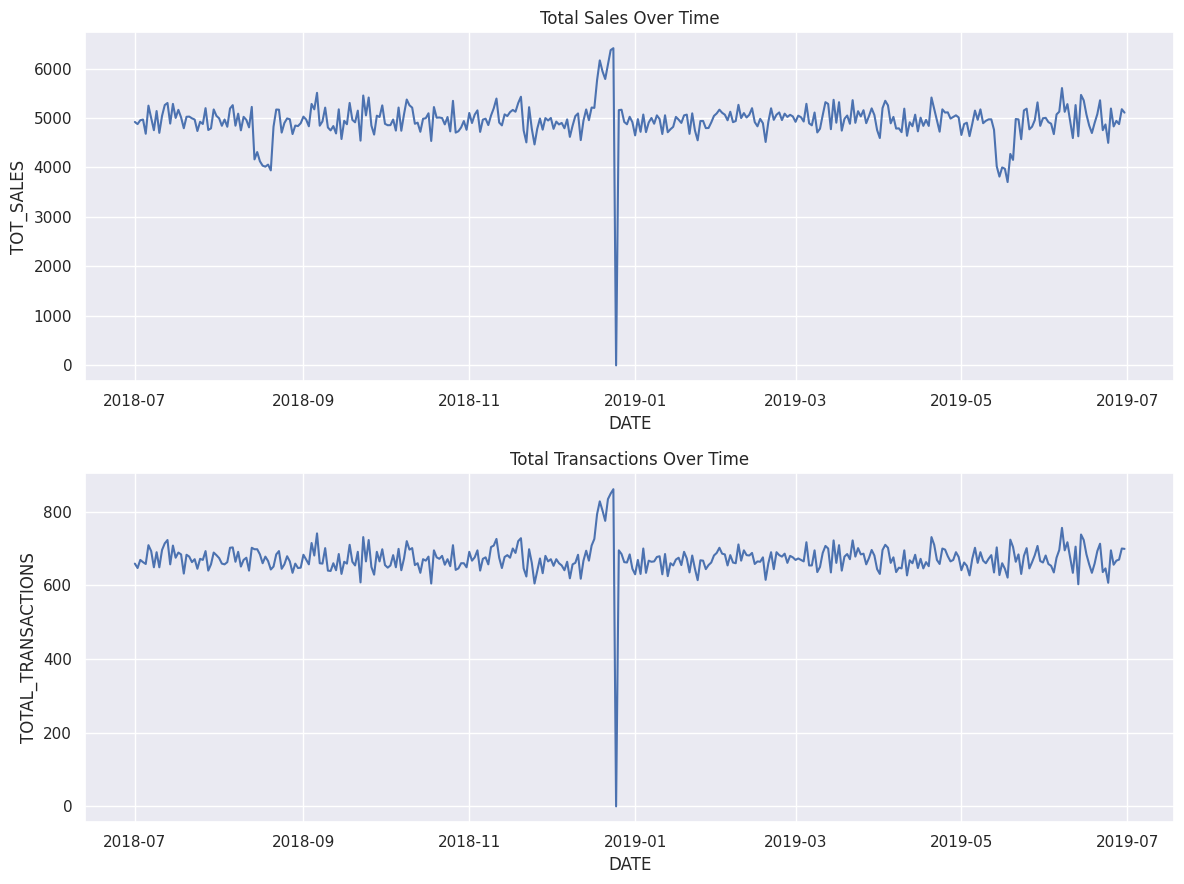

In [40]:
sales_over_time = chips.groupby('DATE')['TOT_SALES'].sum().reset_index()

transactions_over_time = chips.groupby('DATE')['TXN_ID'].nunique().reset_index()
transactions_over_time.rename(columns={'TXN_ID': 'TOTAL_TRANSACTIONS'}, inplace=True)

# ----------------

figure, axes = plt.subplots(2,1, figsize=(12,9))

sns.lineplot(data=sales_over_time, x='DATE', y='TOT_SALES',ax=axes[0])
sns.lineplot(data=transactions_over_time, x='DATE', y='TOTAL_TRANSACTIONS',ax=axes[1])


axes[0].set_title('Total Sales Over Time')
axes[1].set_title('Total Transactions Over Time')
plt.tight_layout()

****

### Pack Sizes

In [41]:
import re
# Function to parse the pack size from PROD_NAME
def parse_pack_size(prod_name):
    match = re.search(r'\d+', prod_name)
    if match:
        return int(match.group())
    return None

# Apply the function to create the PACK_SIZE column
chips['PROD_NAME'] = chips['PROD_NAME'].astype(str)
chips['PACK_SIZE'] = chips['PROD_NAME'].apply(parse_pack_size)

chips.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,TRANSACTION_VALUE,PACK_SIZE
0,2018-07-01,47.0,47142.0,42540.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,2.0,11.8,23.6,380.0
1,2018-07-01,55.0,55073.0,48884.0,99.0,Pringles Sthrn FriedChicken 134g,2.0,7.4,14.8,134.0
2,2018-07-01,55.0,55073.0,48884.0,91.0,CCs Tasty Cheese 175g,2.0,4.2,8.4,175.0
3,2018-07-01,58.0,58351.0,54374.0,102.0,Kettle Mozzarella Basil & Pesto 175g,2.0,10.8,21.6,175.0
4,2018-07-01,68.0,68193.0,65598.0,44.0,Thins Chips Light& Tangy 175g,2.0,6.6,13.2,175.0


Text(0.5, 1.0, 'Pack Size Frequency')

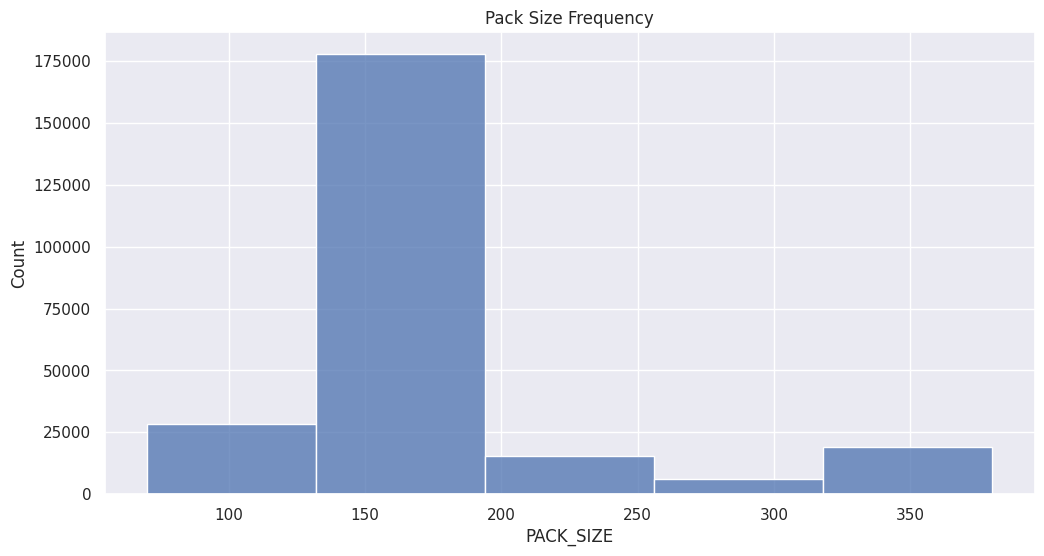

In [42]:
sns.histplot(data=chips,x='PACK_SIZE',bins=5)
plt.title("Pack Size Frequency")

### Brands

In [43]:
# Extract the first word of PROD_NAME
chips['BRANDS'] = chips['PROD_NAME'].apply(lambda x: x.split()[0])
chips.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,TRANSACTION_VALUE,PACK_SIZE,BRANDS
0,2018-07-01,47.0,47142.0,42540.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,2.0,11.8,23.6,380.0,Smiths
1,2018-07-01,55.0,55073.0,48884.0,99.0,Pringles Sthrn FriedChicken 134g,2.0,7.4,14.8,134.0,Pringles
2,2018-07-01,55.0,55073.0,48884.0,91.0,CCs Tasty Cheese 175g,2.0,4.2,8.4,175.0,CCs
3,2018-07-01,58.0,58351.0,54374.0,102.0,Kettle Mozzarella Basil & Pesto 175g,2.0,10.8,21.6,175.0,Kettle
4,2018-07-01,68.0,68193.0,65598.0,44.0,Thins Chips Light& Tangy 175g,2.0,6.6,13.2,175.0,Thins


In [44]:
chips['BRANDS'].value_counts()

BRANDS
Kettle        41288
Smiths        27389
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
nan               1
Name: count, dtype: int64

In [45]:
# Combine similar brand names
chips['BRANDS'] = chips['BRANDS'].replace({'Red': 'RRD','Dorito':'Doritos',
                                                               'Smith':'Smiths','Infzns':'Infuzions',
                                                               'Snbts':'Sunbites',"Grain":"GrainWaves",
                                                               'GrnWves':'GrainWaves'})

chips['BRANDS'].value_counts().to_frame().reset_index()

,BRANDS,count
0,Kettle,41288
1,Smiths,30352
2,Doritos,25224
3,Pringles,25102
4,RRD,16321
5,Infuzions,14201
6,Thins,14075
7,WW,10320
8,Cobs,9693
9,Tostitos,9471


Text(0.5, 1.0, 'Most Popular Brands')

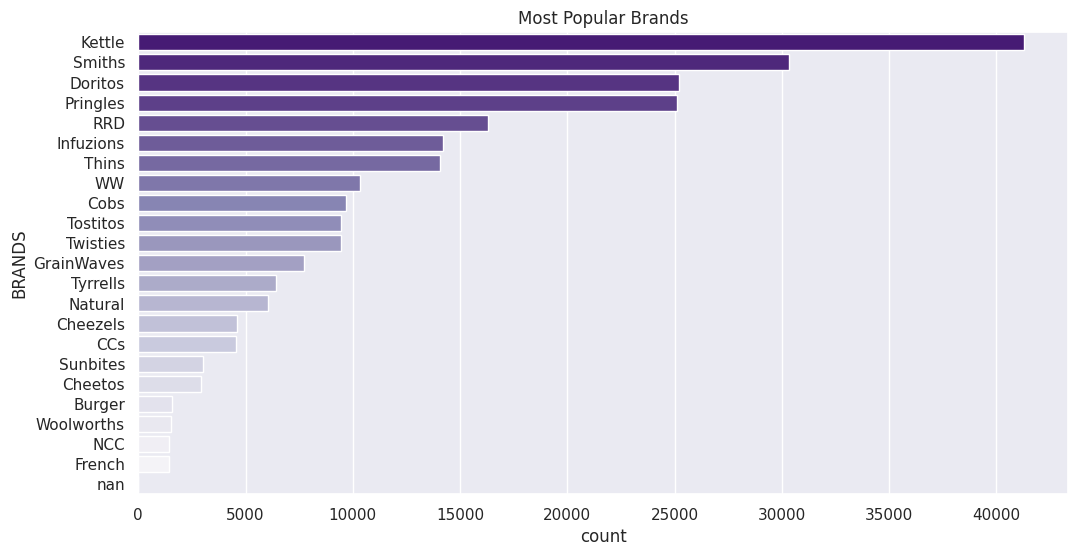

In [46]:
sns.barplot(data=chips['BRANDS'].value_counts().to_frame().reset_index(),y='BRANDS',x='count',palette='Purples_r')
plt.title('Most Popular Brands')

****

## Merged Dataset

In [47]:
merged_data = pd.merge(chips.reset_index(), customers, on='LYLTY_CARD_NBR', how='left')
merged_data.head()

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,TRANSACTION_VALUE,PACK_SIZE,BRANDS,LIFESTAGE,MEMBERSHIP
0,0,2018-07-01,47.0,47142.0,42540.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,2.0,11.8,23.6,380.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
1,1,2018-07-01,55.0,55073.0,48884.0,99.0,Pringles Sthrn FriedChicken 134g,2.0,7.4,14.8,134.0,Pringles,MIDAGE SINGLES/COUPLES,Budget
2,2,2018-07-01,55.0,55073.0,48884.0,91.0,CCs Tasty Cheese 175g,2.0,4.2,8.4,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
3,3,2018-07-01,58.0,58351.0,54374.0,102.0,Kettle Mozzarella Basil & Pesto 175g,2.0,10.8,21.6,175.0,Kettle,MIDAGE SINGLES/COUPLES,Budget
4,4,2018-07-01,68.0,68193.0,65598.0,44.0,Thins Chips Light& Tangy 175g,2.0,6.6,13.2,175.0,Thins,MIDAGE SINGLES/COUPLES,Budget


In [48]:
merged_data.isnull().value_counts()

index  DATE   STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_NAME  PROD_QTY  TOT_SALES  TRANSACTION_VALUE  PACK_SIZE  BRANDS  LIFESTAGE  MEMBERSHIP
False  False  False      False           False   False     False      False     False      False              False      False   False      False         246739
              True       True            True    True      False      True      True       True               True       False   True       True               1
Name: count, dtype: int64

Text(0.5, 1.0, 'Total Sales By Lifestage')

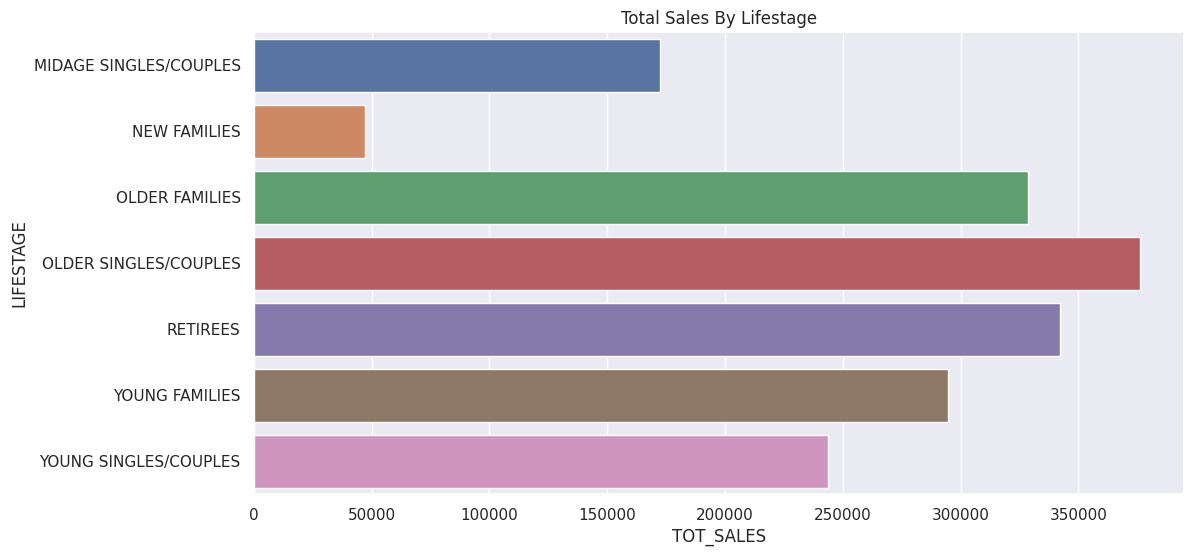

In [49]:
sales_by_lifestage = merged_data.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()
sns.barplot(sales_by_lifestage,x='TOT_SALES',y='LIFESTAGE')
plt.title('Total Sales By Lifestage')

Text(0.5, 1.0, 'Average Price By Lifestage')

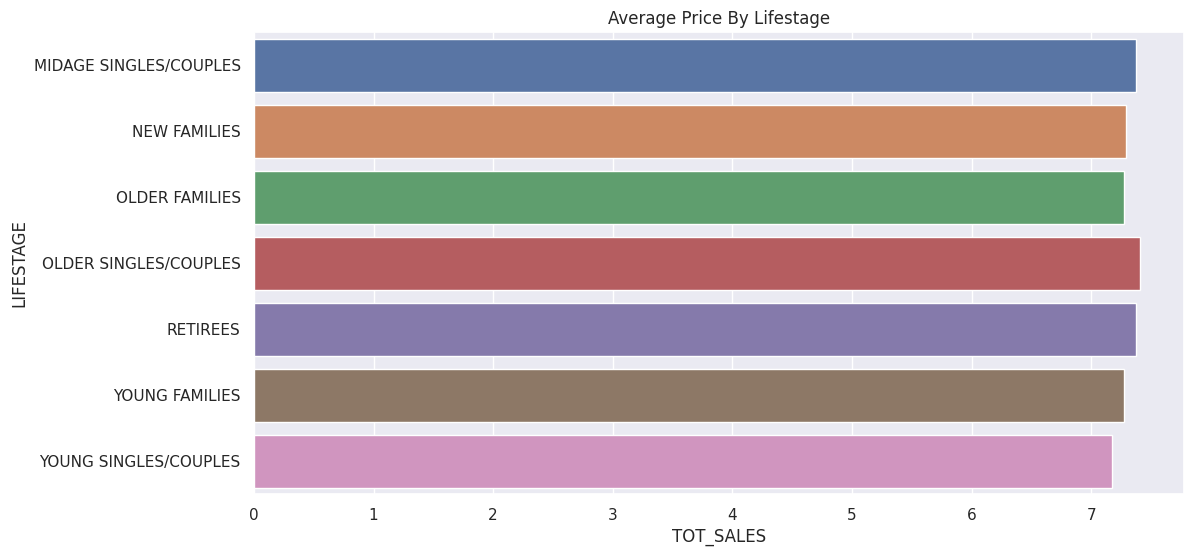

In [50]:
avg_sales_by_lifestage = merged_data.groupby('LIFESTAGE')['TOT_SALES'].mean().reset_index()
sns.barplot(avg_sales_by_lifestage,x='TOT_SALES',y='LIFESTAGE')
plt.title('Average Price By Lifestage')

Text(0.5, 1.0, 'Average Quantity By Lifestage')

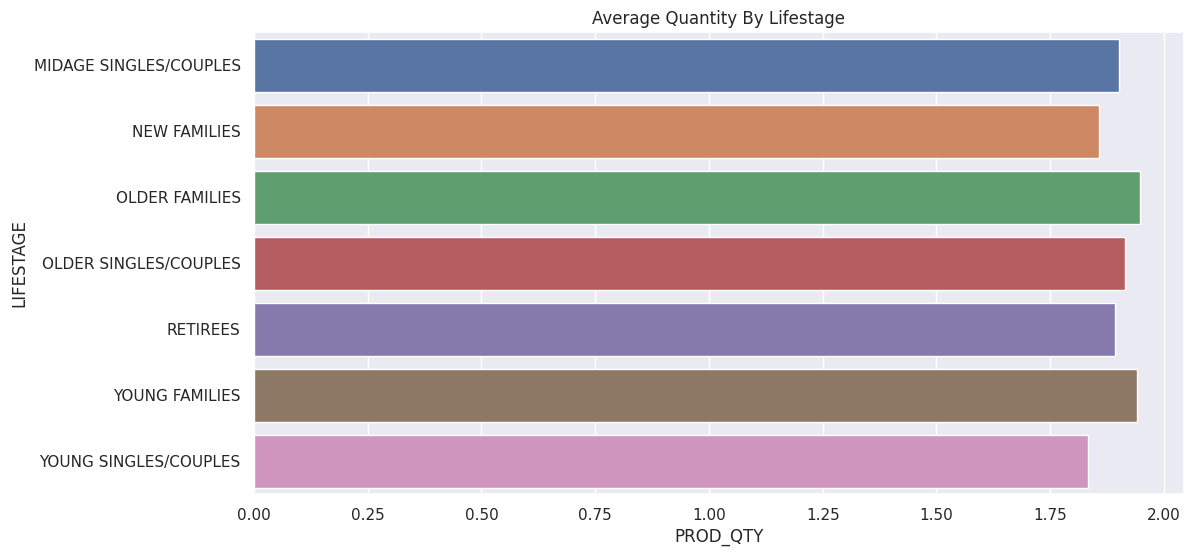

In [51]:
avg_qty_by_lifestage = merged_data.groupby('LIFESTAGE')['PROD_QTY'].mean().reset_index()
sns.barplot(avg_qty_by_lifestage,x='PROD_QTY',y='LIFESTAGE')
plt.title('Average Quantity By Lifestage')

Text(0.5, 1.0, 'Total Sales By Membership')

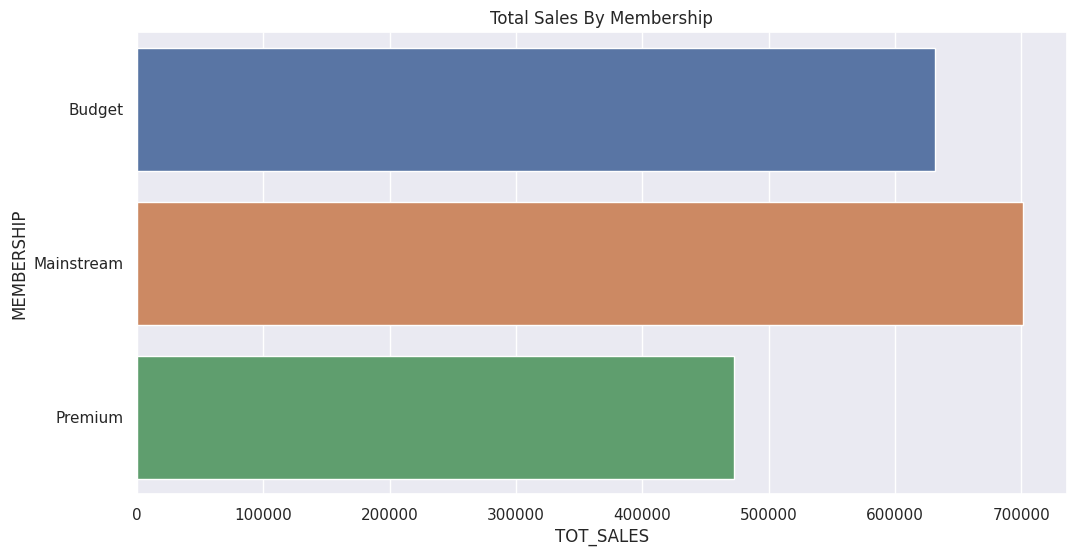

In [52]:
sales_by_premium_customer = merged_data.groupby('MEMBERSHIP')['TOT_SALES'].sum().reset_index()
sns.barplot(sales_by_premium_customer,x='TOT_SALES',y='MEMBERSHIP')
plt.title('Total Sales By Membership')

****

Text(0.5, 1.0, 'Total Customers in each Membership')

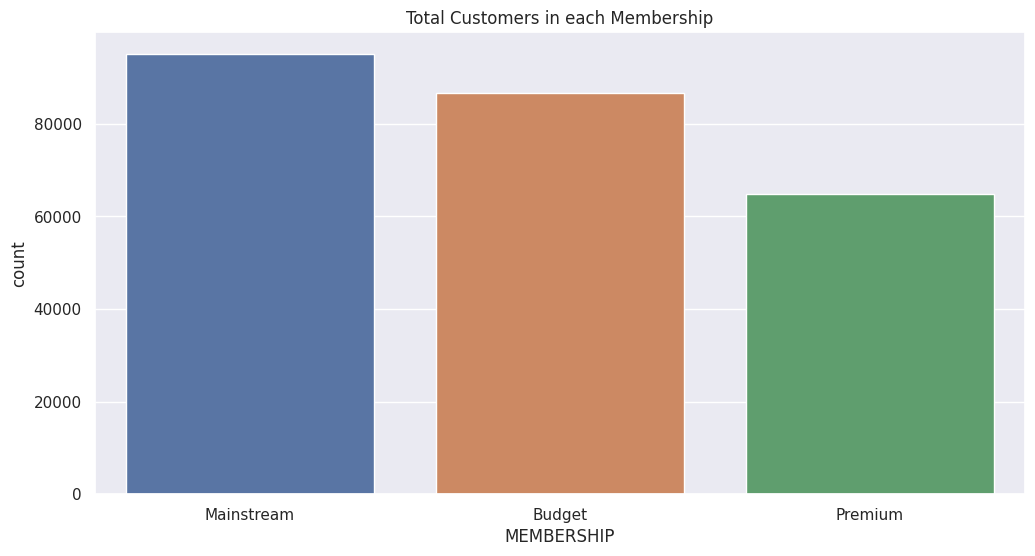

In [53]:
total_customers_membership = merged_data['MEMBERSHIP'].value_counts().to_frame().reset_index()
sns.barplot(data=total_customers_membership,x='MEMBERSHIP',y='count')
plt.title('Total Customers in each Membership')

****

Text(0.5, 1.0, 'Total Quantity By Membership')

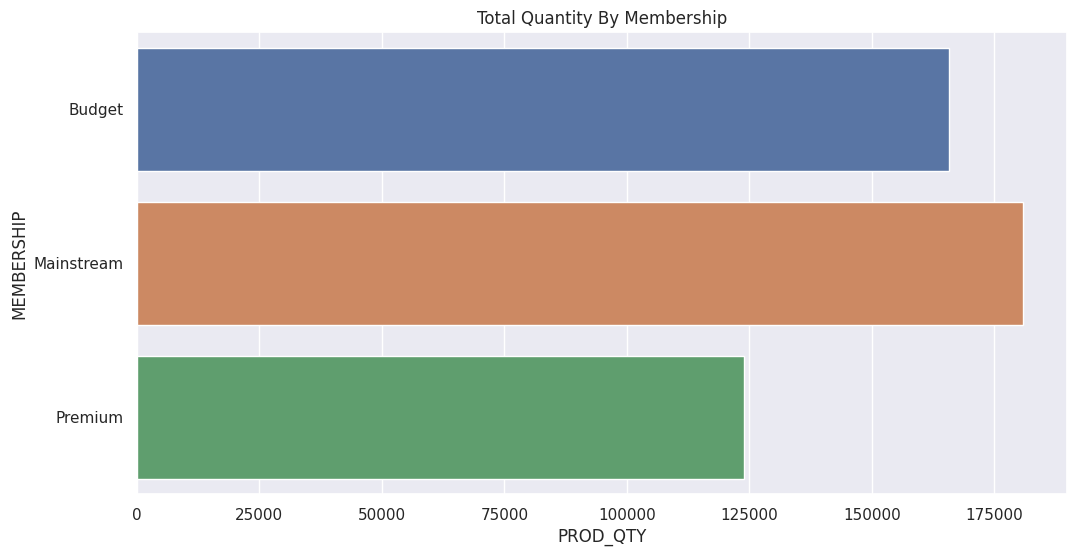

In [54]:
qty_by_membership = merged_data.groupby('MEMBERSHIP')['PROD_QTY'].sum().reset_index()
sns.barplot(qty_by_membership,x='PROD_QTY',y='MEMBERSHIP')
plt.title('Total Quantity By Membership')

****

Text(0.5, 1.0, 'Average Price By Membership')

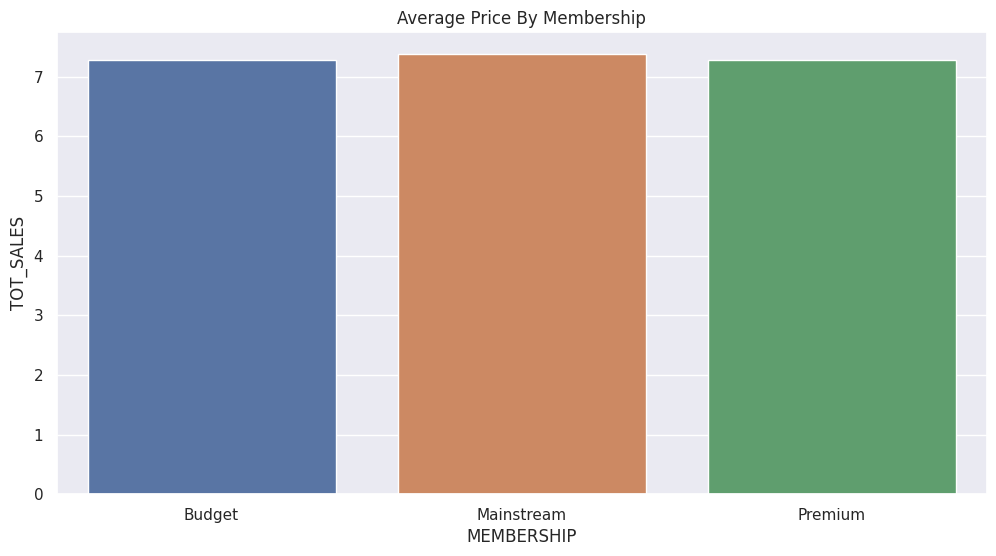

In [55]:
avg_price_by_membership = merged_data.groupby('MEMBERSHIP')['TOT_SALES'].mean().reset_index()
sns.barplot(avg_price_by_membership,x='MEMBERSHIP',y='TOT_SALES')
plt.title('Average Price By Membership')

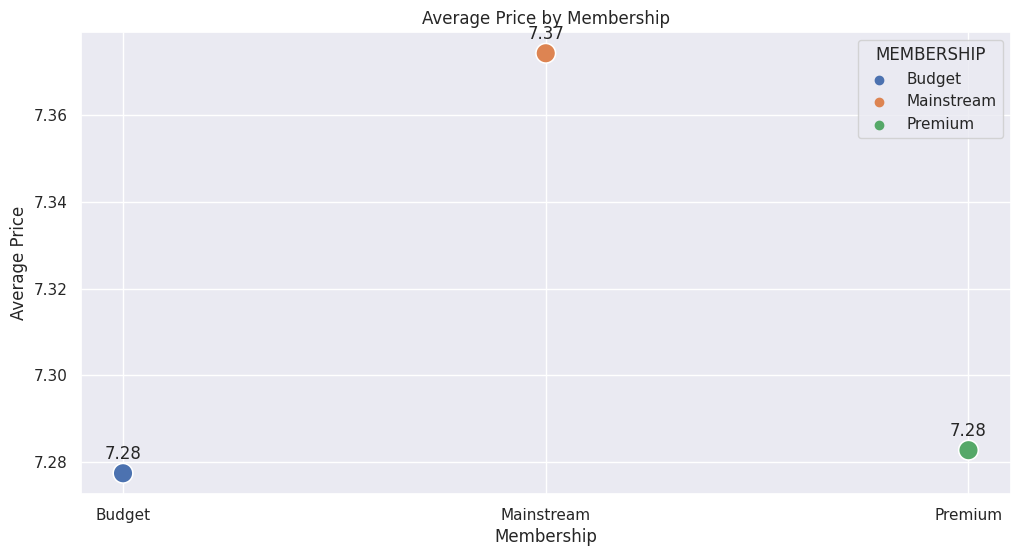

In [56]:
ax = sns.scatterplot(data=avg_price_by_membership, x='MEMBERSHIP', y='TOT_SALES', s=200,hue='MEMBERSHIP')

for i, row in avg_price_by_membership.iterrows():
    ax.annotate(f'{row["TOT_SALES"]:.2f}', (row['MEMBERSHIP'], row['TOT_SALES']), 
                textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Average Price by Membership')
plt.xlabel('Membership')
plt.ylabel('Average Price')
plt.show()

****

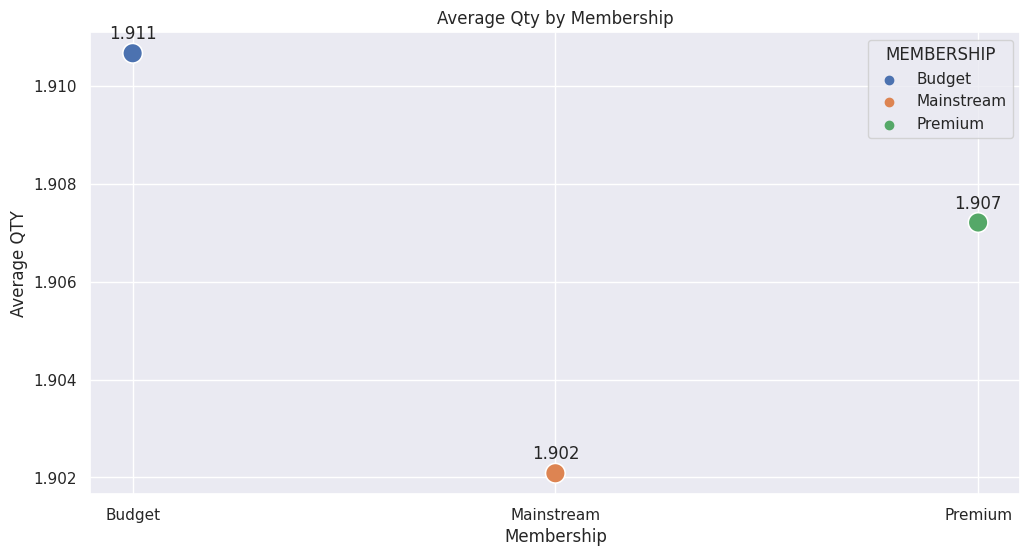

In [57]:
avg_qty_by_membership = merged_data.groupby('MEMBERSHIP')['PROD_QTY'].mean().reset_index()

ax = sns.scatterplot(data=avg_qty_by_membership, x='MEMBERSHIP', y='PROD_QTY', s=200,hue='MEMBERSHIP')

for i, row in avg_qty_by_membership.iterrows():
    ax.annotate(f'{row["PROD_QTY"]:.3f}', (row['MEMBERSHIP'], row['PROD_QTY']), 
                textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Average Qty by Membership')
plt.xlabel('Membership')
plt.ylabel('Average QTY')
plt.show()

****

In [58]:
from scipy import stats

mainstream = merged_data[merged_data['MEMBERSHIP'] == 'Mainstream']['TOT_SALES']
premium = merged_data[merged_data['MEMBERSHIP'] == 'Premium']['TOT_SALES']
budget = merged_data[merged_data['MEMBERSHIP'] == 'Budget']['TOT_SALES']

t_stat_mainstream_vs_premium, p_value_mainstream_vs_premium = stats.ttest_ind(mainstream, premium)
t_stat_mainstream_vs_budget, p_value_mainstream_vs_budget = stats.ttest_ind(mainstream, budget)
t_stat_premium_vs_budget, p_value_premium_vs_budget = stats.ttest_ind(premium, budget)

# Print results
print(f"T-test Mainstream vs Premium: T-statistic = {t_stat_mainstream_vs_premium:.2f}, P-value = {p_value_mainstream_vs_premium:.4f}")
print(f"T-test Mainstream vs Budget: T-statistic = {t_stat_mainstream_vs_budget:.2f}, P-value = {p_value_mainstream_vs_budget:.4f}")
print(f"T-test premium vs Budget: T-statistic = {t_stat_premium_vs_budget:.2f}, P-value = {p_value_premium_vs_budget:.4f}")


T-test Mainstream vs Premium: T-statistic = 7.27, P-value = 0.0000
T-test Mainstream vs Budget: T-statistic = 8.34, P-value = 0.0000
T-test premium vs Budget: T-statistic = 0.41, P-value = 0.6804


In [59]:
midage_singles_couples = merged_data[merged_data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES']['TOT_SALES']
young_singles_couples = merged_data[merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES']['TOT_SALES']

t_stat, p_value = stats.ttest_ind(midage_singles_couples, young_singles_couples)

# Print results
print(f"T-test Midage Singles/Couples vs Young Singles/Couples: T-statistic = {t_stat:.2f}, P-value = {p_value:.4f}")


T-test Midage Singles/Couples vs Young Singles/Couples: T-statistic = 9.16, P-value = 0.0000


**p-value of 0.00 indicates a very strong statistical difference**

****
****

## Trial & Control Stores

In [60]:
trial_stores = merged_data[merged_data['STORE_NBR'].isin([77, 86, 88])]
trial_stores.head(1)

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,TRANSACTION_VALUE,PACK_SIZE,BRANDS,LIFESTAGE,MEMBERSHIP
31,31,2018-07-01,88.0,88076.0,86585.0,9.0,Kettle Tortilla ChpsBtroot&Ricotta 150g,2.0,9.2,18.4,150.0,Kettle,MIDAGE SINGLES/COUPLES,Mainstream


### Metrics

In [61]:
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'])

grouped = merged_data.groupby([merged_data['STORE_NBR'], merged_data['DATE'].dt.to_period('M')])

# Calculate metrics
measureOverTime = grouped.agg(
    total_sales=pd.NamedAgg(column='TOT_SALES', aggfunc='sum'),
    num_customers=pd.NamedAgg(column='LYLTY_CARD_NBR', aggfunc=pd.Series.nunique),
    total_transactions=pd.NamedAgg(column='TXN_ID', aggfunc='count'),
    total_chips=pd.NamedAgg(column='PROD_QTY', aggfunc='sum')
)

# Calculate additional metrics
measureOverTime['transactions_per_customer'] = measureOverTime['total_transactions'] / measureOverTime['num_customers']
measureOverTime['chips_per_customer'] = measureOverTime['total_chips'] / measureOverTime['num_customers']
measureOverTime['avg_price_per_unit'] = measureOverTime['total_sales'] / measureOverTime['total_chips']

# Reset index to flatten the DataFrame
measureOverTime = measureOverTime.reset_index()

# Extract year and month for filtering
measureOverTime['YEAR'] = measureOverTime['DATE'].dt.year
measureOverTime['MONTH'] = measureOverTime['DATE'].dt.month
measureOverTime['YEARMONTH'] = measureOverTime['YEAR'] * 100 + measureOverTime['MONTH']

# Identify stores with a full 12 months of observations
storesWithFullObs = measureOverTime.groupby('STORE_NBR').filter(lambda x: x['YEARMONTH'].nunique() == 12)['STORE_NBR'].unique()

# Filter to pre-trial period and stores with full observation periods
preTrialMeasures = measureOverTime[(measureOverTime['YEARMONTH'] < 201902) & (measureOverTime['STORE_NBR'].isin(storesWithFullObs))]

preTrialMeasures.head()

,STORE_NBR,DATE,total_sales,num_customers,total_transactions,total_chips,transactions_per_customer,chips_per_customer,avg_price_per_unit,YEAR,MONTH,YEARMONTH
0,1.0,2018-07,188.9,47,49,58.0,1.042553,1.234043,3.256897,2018,7,201807
1,1.0,2018-08,168.4,41,41,52.0,1.000000,1.268293,3.238462,2018,8,201808
2,1.0,2018-09,268.1,57,59,71.0,1.035088,1.245614,3.776056,2018,9,201809
3,1.0,2018-10,175.4,39,40,51.0,1.025641,1.307692,3.439216,2018,10,201810
4,1.0,2018-11,184.8,44,45,55.0,1.022727,1.250000,3.360000,2018,11,201811


In [62]:
def calculate_correlations(measure_df,store, metric):
    """
    Parameters:
    measure_df (pd.DataFrame): The pre-trial measures dataframe.
    store (int): Trial Store Number.
    metric (str): The metric to compare.
    
    Returns:
    pd.DataFrame: Dataframe with store numbers and their respective correlations.
    """
    results = []
    store_numbers = measure_df['STORE_NBR'].unique()
    store_data = measure_df[measure_df['STORE_NBR'] == store]


    for control_store in store_numbers:
        if store != control_store:
            control_data = measure_df[measure_df['STORE_NBR'] == control_store]
            
            # Merge the data on YEARMONTH
            merged = store_data.merge(control_data, on='YEARMONTH', suffixes=('_store', '_control'))
            
            # Calculate the correlation
            correlation = merged[metric + '_store'].corr(merged[metric + '_control'])
            
            results.append({
                'store': store,
                'control_store': control_store,
                'correlation_'+metric: correlation
            })
    
    return pd.DataFrame(results)

****

In [63]:
def calculate_smd(data, store_col, measure_col, treatment_store):
    """
    Calculate the standardized magnitude distance (SMD) between trial
    and control stores for a given measure.
    
    Parameters:
    data (pd.DataFrame): The dataframe containing the measures.
    store_col (str): The column name for store numbers.
    measure_col (str): The column name for the measure to compare.
    treatment_store (int or str): The treatment store number.
    control_store (int or str): The control store number.
    
    Returns:
    float: The standardized magnitude distance (SMD) between the treatment
           and control stores for the specified measure.
    """
    
    # Filter data for treatment and control stores
    results= []
    treatment_data = data[data[store_col] == treatment_store][measure_col]
    
    store_numbers = data['STORE_NBR'].unique()
    for control in store_numbers:
        if control != measure_col:
            control_data = data[data[store_col] == control][measure_col]
    
        # Calculate means and standard deviations
        mean_treatment = treatment_data.mean()
        mean_control = control_data.mean()
        sd_treatment = treatment_data.std()
        sd_control = control_data.std()
    
        # Calculate pooled standard deviation
        pooled_sd = ((sd_treatment**2 + sd_control**2) / 2)**0.5
        
        # Calculate SMD
        smd = (mean_treatment - mean_control) / pooled_sd
        smd = max(smd, 0)
        
        results.append({
                'store': treatment_store,
                'control_store': control,
                'smd': smd
            })
    results= pd.DataFrame(results)
    results['smd'] = results['smd']/results['smd'].max()
    return pd.DataFrame(results)

In [64]:
store_77_corr_totsales = calculate_correlations(preTrialMeasures, 77, 'total_sales')
store_77_corr_ncustomers = calculate_correlations(preTrialMeasures, 77, 'num_customers')

store_77_smd_value = calculate_smd(preTrialMeasures, 'STORE_NBR', 'total_sales', treatment_store=77)
store_77 = store_77_corr_totsales.merge(store_77_smd_value, on=['store','control_store'], how='inner')
store_77 = store_77_corr_ncustomers.merge(store_77, on=['store','control_store'], how='inner')

store_77.sort_values(by=['correlation_num_customers','correlation_total_sales','smd'],ascending=False)

,store,control_store,correlation_num_customers,correlation_total_sales,smd
219,77,233.0,0.965682,0.973643,0.021617
110,77,119.0,0.919064,0.775571,0.000000
105,77,113.0,0.901630,0.747222,0.000000
239,77,254.0,0.901610,0.584873,0.341321
32,77,35.0,0.892741,0.691090,0.481592
...,...,...,...,...,...
213,77,227.0,-0.750629,-0.504082,0.000000
176,77,186.0,-0.766873,-0.917131,0.333311
160,77,169.0,-0.784241,-0.649459,0.000000
8,77,9.0,-0.804504,-0.813285,0.000000


**Control store : store number 233 with 0.965 , 0.973 correlation in number of customers and total sales**

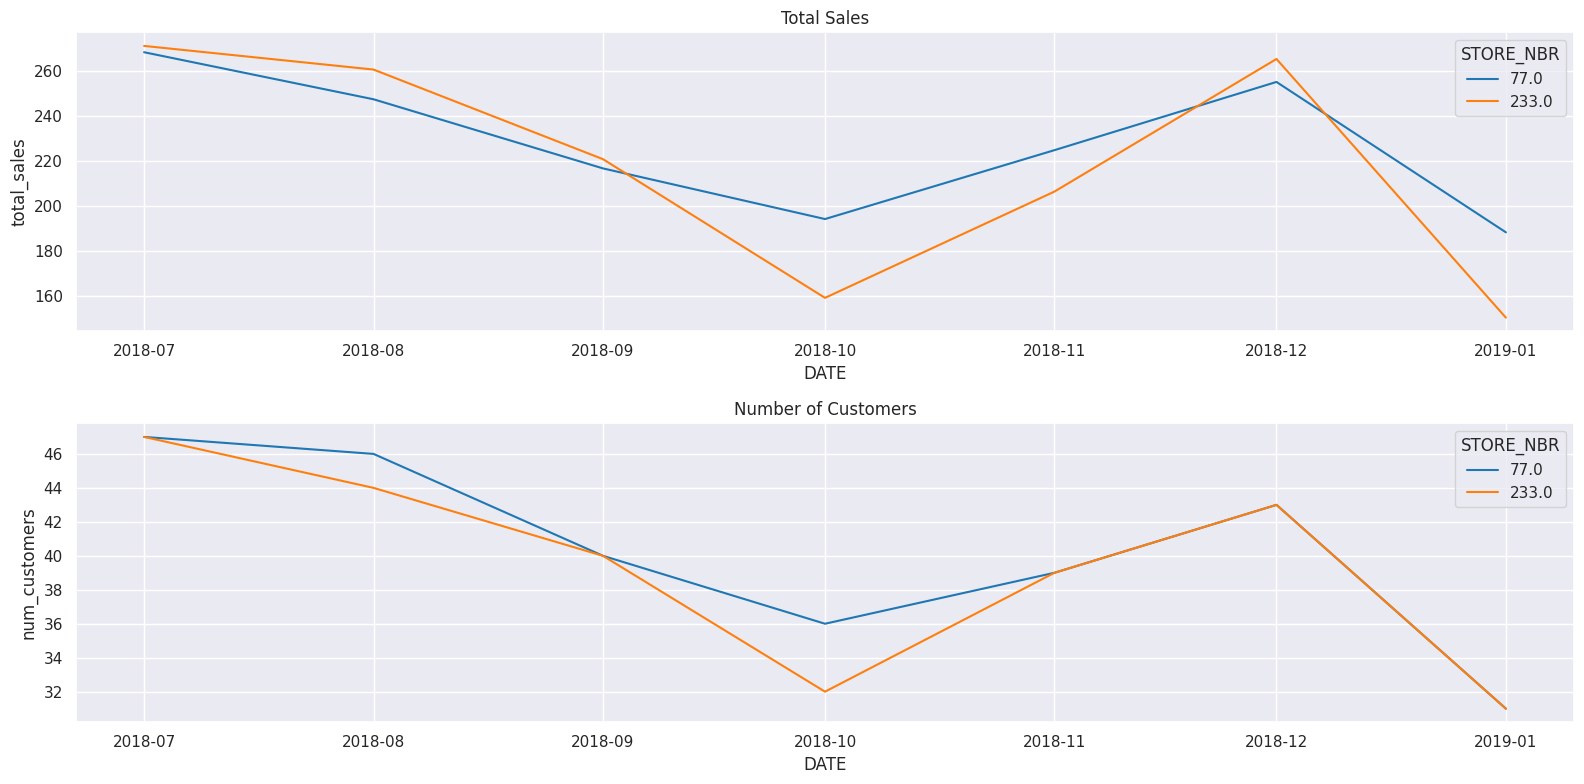

In [65]:
store_77_233 = preTrialMeasures[preTrialMeasures['STORE_NBR'].isin([77, 233])]

# Convert 'DATE' column from PeriodDtype to TimestampDtype
store_77_233['DATE'] = store_77_233['DATE'].dt.to_timestamp()

fig, axes = plt.subplots(2, 1, figsize=(16, 8))

sns.lineplot(data=store_77_233, x='DATE', y='total_sales', ax=axes[0], hue='STORE_NBR',palette='tab10')
sns.lineplot(data=store_77_233, x='DATE', y='num_customers', ax=axes[1], hue='STORE_NBR',palette='tab10')

axes[0].set_title('Total Sales')
axes[1].set_title('Number of Customers')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Number of Customers')

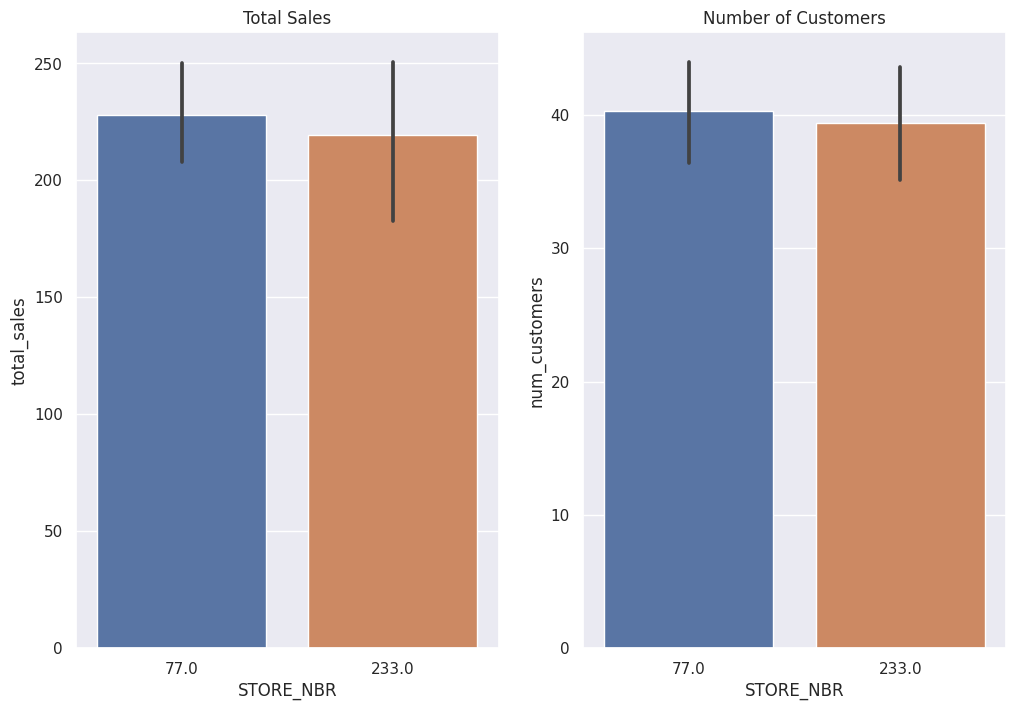

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

sns.barplot(store_77_233,x='STORE_NBR',y='total_sales',ax=axes[0])
sns.barplot(store_77_233,x='STORE_NBR',y='num_customers',ax=axes[1])
axes[0].set_title('Total Sales')
axes[1].set_title('Number of Customers')


**Indeed, both stores have close numberss**

In [67]:
preTrialMeasures

,STORE_NBR,DATE,total_sales,num_customers,total_transactions,total_chips,transactions_per_customer,chips_per_customer,avg_price_per_unit,YEAR,MONTH,YEARMONTH
0,1.0,2018-07,188.9,47,49,58.0,1.042553,1.234043,3.256897,2018,7,201807
1,1.0,2018-08,168.4,41,41,52.0,1.000000,1.268293,3.238462,2018,8,201808
2,1.0,2018-09,268.1,57,59,71.0,1.035088,1.245614,3.776056,2018,9,201809
3,1.0,2018-10,175.4,39,40,51.0,1.025641,1.307692,3.439216,2018,10,201810
4,1.0,2018-11,184.8,44,45,55.0,1.022727,1.250000,3.360000,2018,11,201811
...,...,...,...,...,...,...,...,...,...,...,...,...
3155,272.0,2018-09,294.5,31,35,69.0,1.129032,2.225806,4.268116,2018,9,201809
3156,272.0,2018-10,405.1,41,48,94.0,1.170732,2.292683,4.309574,2018,10,201810
3157,272.0,2018-11,355.8,39,43,83.0,1.102564,2.128205,4.286747,2018,11,201811
3158,272.0,2018-12,363.1,43,43,81.0,1.000000,1.883721,4.482716,2018,12,201812


In [68]:
measureOverTime

,STORE_NBR,DATE,total_sales,num_customers,total_transactions,total_chips,transactions_per_customer,chips_per_customer,avg_price_per_unit,YEAR,MONTH,YEARMONTH
0,1.0,2018-07,188.9,47,49,58.0,1.042553,1.234043,3.256897,2018,7,201807
1,1.0,2018-08,168.4,41,41,52.0,1.000000,1.268293,3.238462,2018,8,201808
2,1.0,2018-09,268.1,57,59,71.0,1.035088,1.245614,3.776056,2018,9,201809
3,1.0,2018-10,175.4,39,40,51.0,1.025641,1.307692,3.439216,2018,10,201810
4,1.0,2018-11,184.8,44,45,55.0,1.022727,1.250000,3.360000,2018,11,201811
...,...,...,...,...,...,...,...,...,...,...,...,...
3160,272.0,2019-02,385.3,44,47,89.0,1.068182,2.022727,4.329213,2019,2,201902
3161,272.0,2019-03,421.9,48,51,97.0,1.062500,2.020833,4.349485,2019,3,201903
3162,272.0,2019-04,445.1,54,56,105.0,1.037037,1.944444,4.239048,2019,4,201904
3163,272.0,2019-05,314.6,34,40,71.0,1.176471,2.088235,4.430986,2019,5,201905


In [69]:
trial_store = 77
control_store = 233

# Filtering the pre-trial period
pre_trial_trial_store_sales = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trial_store) & 
                                               (preTrialMeasures['YEARMONTH'] < 201902)]['total_sales'].sum()
pre_trial_control_store_sales = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == control_store) & 
                                                 (preTrialMeasures['YEARMONTH'] < 201902)]['total_sales'].sum()

# Calculating the scaling factor
scaling_factor_for_control_sales = pre_trial_trial_store_sales / pre_trial_control_store_sales
scaling_factor_for_control_sales

1.0397523623330076

In [70]:
control_store_sales = measureOverTime.query('STORE_NBR == 233').filter(['YEARMONTH', 'total_sales'], axis=1)
control_store_sales.rename(columns={'total_sales': 'store_233_sales'}, inplace=True)

trial_store_sales = measureOverTime.query('STORE_NBR == 77').filter(['YEARMONTH', 'total_sales'], axis=1)
trial_store_sales.rename(columns={'total_sales': 'store_77_sales'}, inplace=True)

sales_data = control_store_sales.merge(trial_store_sales,on='YEARMONTH',how='inner')
# Applying Scaling Factor
sales_data['store_233_sales'] = sales_data['store_233_sales']*scaling_factor_for_control_sales

In [71]:
sales_data['pct_diff']=abs(((sales_data['store_233_sales']/sales_data['store_77_sales'])-1)*100)
sales_data['pct_diff'] = sales_data['pct_diff'].round(2)
sales_data

,YEARMONTH,store_233_sales,store_77_sales,pct_diff
0,201807,281.980841,268.4,5.06
1,201808,271.063441,247.5,9.52
2,201809,229.681297,216.8,5.94
3,201810,165.632551,194.3,14.75
4,201811,214.708863,224.9,4.53
5,201812,275.950277,255.2,8.13
6,201901,156.482731,188.4,16.94
7,201902,229.473346,211.6,8.45
8,201903,187.779277,255.1,26.39
9,201904,149.932291,258.1,41.91


In [72]:
pre_trial_sales_data= sales_data[sales_data['YEARMONTH'] <201902]
trial_sales_data= sales_data[sales_data['YEARMONTH'] >=201902]
print(f'''Standard Deviation of Percentage Difference in Pre-Trial Period: {pre_trial_sales_data['pct_diff'].std()},
While Standard Deviation of Percentage Difference in Trial Period: {trial_sales_data['pct_diff'].std()}''')

Standard Deviation of Percentage Difference in Pre-Trial Period: 4.856300767338978,
While Standard Deviation of Percentage Difference in Trial Period: 12.562436865512995


In [73]:
from scipy.stats import t

# 1. Calculate the t-values for the trial months
trial_sales_data['t_value'] = (trial_sales_data['pct_diff'] - 0) / pre_trial_sales_data['pct_diff'].std()

# 2. Determine the 95th percentile of the t-distribution
degreesOfFreedom = 7
critical_value = t.ppf(0.95, df=degreesOfFreedom)

# 3. Check for statistical significance
trial_sales_data['is_significant'] = np.abs(trial_sales_data['t_value']) > critical_value

print(trial_sales_data[['YEARMONTH', 't_value', 'is_significant']])


    YEARMONTH   t_value  is_significant
7      201902  1.740008           False
8      201903  5.434177            True
9      201904  8.630026            True
10     201905  3.947449            True
11     201906  3.488252            True


**From the data, it can be seen that the percentage difference in sales for February 2019 (201902) is not statistically significant at the 95% confidence level. However, for the months March 2019 to June 2019 (201903 - 201906), the percentage differences are statistically significant. This indicates that there were notable changes in sales during these months compared to the pre-trial period.**

In [74]:
measureOverTime

,STORE_NBR,DATE,total_sales,num_customers,total_transactions,total_chips,transactions_per_customer,chips_per_customer,avg_price_per_unit,YEAR,MONTH,YEARMONTH
0,1.0,2018-07,188.9,47,49,58.0,1.042553,1.234043,3.256897,2018,7,201807
1,1.0,2018-08,168.4,41,41,52.0,1.000000,1.268293,3.238462,2018,8,201808
2,1.0,2018-09,268.1,57,59,71.0,1.035088,1.245614,3.776056,2018,9,201809
3,1.0,2018-10,175.4,39,40,51.0,1.025641,1.307692,3.439216,2018,10,201810
4,1.0,2018-11,184.8,44,45,55.0,1.022727,1.250000,3.360000,2018,11,201811
...,...,...,...,...,...,...,...,...,...,...,...,...
3160,272.0,2019-02,385.3,44,47,89.0,1.068182,2.022727,4.329213,2019,2,201902
3161,272.0,2019-03,421.9,48,51,97.0,1.062500,2.020833,4.349485,2019,3,201903
3162,272.0,2019-04,445.1,54,56,105.0,1.037037,1.944444,4.239048,2019,4,201904
3163,272.0,2019-05,314.6,34,40,71.0,1.176471,2.088235,4.430986,2019,5,201905


In [75]:
# Create new variables in the DataFrame
trial_store = 77
control_store = 233

pastSales = measureOverTime[(measureOverTime['STORE_NBR'] == trial_store) | (measureOverTime['STORE_NBR'] == control_store)].copy()

# Assume stdDev is calculated based on some logic
stdDev = sales_data[sales_data['YEARMONTH']<201902]['pct_diff'].std()


# Control store 95th percentile
pastSales_Controls95 = pastSales[pastSales['STORE_NBR'] == control_store].copy()

pastSales_Controls95['total_sales'] = pastSales_Controls95['total_sales'] * (1 + stdDev* 2)
pastSales_Controls95['STORE_NBR'] = 233.95

# Control store 5th percentile
pastSales_Controls5 = pastSales[pastSales['STORE_NBR'] == control_store].copy()
pastSales_Controls5['total_sales'] = pastSales_Controls5['total_sales'] * (1 - stdDev * 2)
pastSales_Controls5['STORE_NBR'] = 233.05

# Combine the data
trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5])
trialAssessment.head()

,STORE_NBR,DATE,total_sales,num_customers,total_transactions,total_chips,transactions_per_customer,chips_per_customer,avg_price_per_unit,YEAR,MONTH,YEARMONTH
880,77.0,2018-07,268.4,47,51,77.0,1.085106,1.638298,3.485714,2018,7,201807
881,77.0,2018-08,247.5,46,46,71.0,1.000000,1.543478,3.485915,2018,8,201808
882,77.0,2018-09,216.8,40,42,66.0,1.050000,1.650000,3.284848,2018,9,201809
883,77.0,2018-10,194.3,36,37,50.0,1.027778,1.388889,3.886000,2018,10,201810
884,77.0,2018-11,224.9,39,42,63.0,1.076923,1.615385,3.569841,2018,11,201811


In [76]:
pastSales_Controls95

,STORE_NBR,DATE,total_sales,num_customers,total_transactions,total_chips,transactions_per_customer,chips_per_customer,avg_price_per_unit,YEAR,MONTH,YEARMONTH
2695,233.95,2018-07,2905.257536,47,49,79.0,1.042553,1.680851,3.432911,2018,7,201807
2696,233.95,2018-08,2792.775220,44,45,72.0,1.022727,1.636364,3.620833,2018,8,201808
2697,233.95,2018-09,2366.413679,40,43,68.0,1.075000,1.700000,3.248529,2018,9,201809
2698,233.95,2018-10,1706.517424,32,32,48.0,1.000000,1.500000,3.318750,2018,10,201810
2699,233.95,2018-11,2212.152217,39,40,61.0,1.025641,1.564103,3.385246,2018,11,201811
2700,233.95,2018-12,2843.124447,43,45,70.0,1.046512,1.627907,3.791429,2018,12,201812
2701,233.95,2019-01,1612.246531,31,31,41.0,1.000000,1.322581,3.670732,2019,1,201901
2702,233.95,2019-02,2364.271159,42,43,64.0,1.023810,1.523810,3.448437,2019,2,201902
2703,233.95,2019-03,1934.695837,35,36,52.0,1.028571,1.485714,3.473077,2019,3,201903
2704,233.95,2019-04,1544.757141,27,29,41.0,1.074074,1.518519,3.517073,2019,4,201904


In [77]:
trialAssessment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 880 to 2706
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype    
---  ------                     --------------  -----    
 0   STORE_NBR                  48 non-null     float64  
 1   DATE                       48 non-null     period[M]
 2   total_sales                48 non-null     float64  
 3   num_customers              48 non-null     int64    
 4   total_transactions         48 non-null     int64    
 5   total_chips                48 non-null     float64  
 6   transactions_per_customer  48 non-null     float64  
 7   chips_per_customer         48 non-null     float64  
 8   avg_price_per_unit         48 non-null     float64  
 9   YEAR                       48 non-null     int64    
 10  MONTH                      48 non-null     int64    
 11  YEARMONTH                  48 non-null     int64    
dtypes: float64(6), int64(5), period[M](1)
memory usage: 4.9 KB


In [78]:
normal_sales_df = trialAssessment[trialAssessment['STORE_NBR'].isin([77.0, 233.0])]
percentile_sales_df= trialAssessment[~trialAssessment['STORE_NBR'].isin([77.0, 233.0])]

normal_sales_df['DATE'] = normal_sales_df['DATE'].dt.to_timestamp() 
percentile_sales_df['DATE'] = percentile_sales_df['DATE'].dt.to_timestamp()

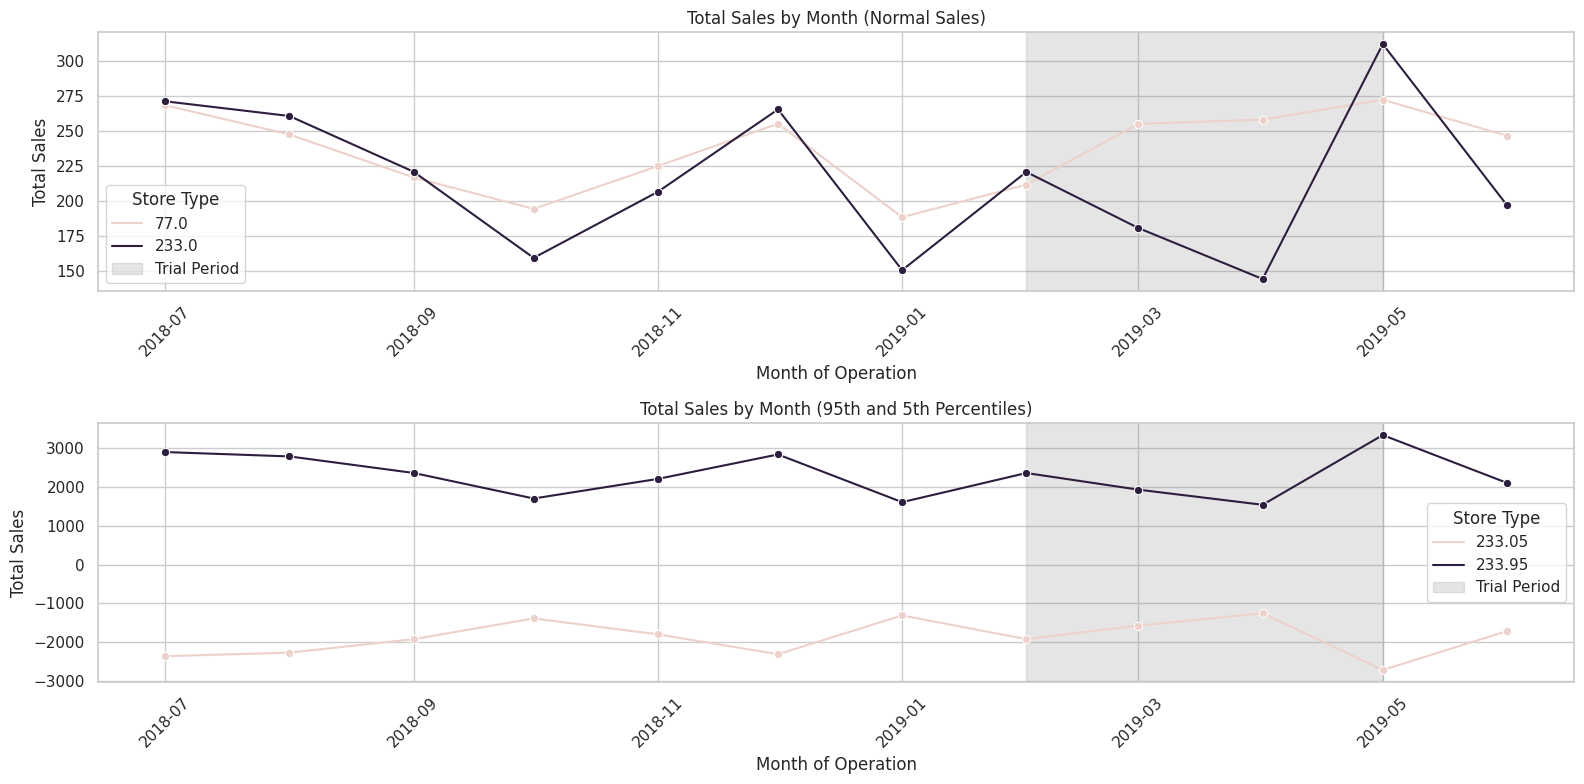

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the subplots
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Highlight the trial period
trial_period = (pd.to_datetime('201902', format='%Y%m'), pd.to_datetime('201905', format='%Y%m'))

# Plot the normal total sales on the first subplot
sns.lineplot(x='DATE', y='total_sales', hue='STORE_NBR', data=normal_sales_df, marker='o', ax=axes[0])
axes[0].axvspan(trial_period[0], trial_period[1], color='grey', alpha=0.2, label='Trial Period')
axes[0].set_title('Total Sales by Month (Normal Sales)')
axes[0].set_xlabel('Month of Operation')
axes[0].set_ylabel('Total Sales')
axes[0].legend(title='Store Type')
axes[0].tick_params(axis='x', rotation=45)

# Plot the 95th and 5th percentiles on the second subplot
sns.lineplot(x='DATE', y='total_sales', hue='STORE_NBR', data=percentile_sales_df, marker='o', ax=axes[1])
axes[1].axvspan(trial_period[0], trial_period[1], color='grey', alpha=0.2, label='Trial Period')
axes[1].set_title('Total Sales by Month (95th and 5th Percentiles)')
axes[1].set_xlabel('Month of Operation')
axes[1].set_ylabel('Total Sales')
axes[1].legend(title='Store Type')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


****

### Num of Customers

In [80]:
control_store_num_customers = measureOverTime.query('STORE_NBR == 233').filter(['YEARMONTH', 'num_customers'], axis=1)
control_store_num_customers.rename(columns={'num_customers': 'store_233_num_customers'}, inplace=True)

# Filtering the pre-trial period
pre_trial_trial_store_num_customers = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trial_store) & 
                                               (preTrialMeasures['YEARMONTH'] < 201902)]['num_customers'].sum()
pre_trial_control_store_num_customers = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == control_store) & 
                                                 (preTrialMeasures['YEARMONTH'] < 201902)]['num_customers'].sum()

# Calculating the scaling factor
scaling_factor_for_num_customers = pre_trial_trial_store_num_customers / pre_trial_control_store_num_customers
scaling_factor_for_num_customers

trial_store_num_customers = measureOverTime.query('STORE_NBR == 77').filter(['YEARMONTH', 'num_customers'], axis=1)
trial_store_num_customers.rename(columns={'num_customers': 'store_77_num_customers'}, inplace=True)

num_customers_data = control_store_num_customers.merge(trial_store_num_customers,on='YEARMONTH',how='inner')
# Applying Scaling Factornum_customers
num_customers_data['store_233_num_customers'] =num_customers_data['store_233_num_customers']*scaling_factor_for_num_customers
num_customers_data['pct_diff']=abs(((num_customers_data['store_233_num_customers']/num_customers_data['store_77_num_customers'])-1)*100)
num_customers_data['pct_diff'] = num_customers_data['pct_diff'].round(2)
num_customers_data

,YEARMONTH,store_233_num_customers,store_77_num_customers,pct_diff
0,201807,48.021739,47,2.17
1,201808,44.956522,46,2.27
2,201809,40.869565,40,2.17
3,201810,32.695652,36,9.18
4,201811,39.847826,39,2.17
5,201812,43.934783,43,2.17
6,201901,31.673913,31,2.17
7,201902,42.913043,40,7.28
8,201903,35.760870,46,22.26
9,201904,27.586957,47,41.30


In [81]:
# Calculate standard deviation based on pre-trial percentage difference
std_dev = np.std(num_customers_data[num_customers_data['YEARMONTH'] < 201902]['pct_diff'])

# Define degrees of freedom (length of pre-trial period - 1)
degrees_of_freedom = len(num_customers_data[num_customers_data['YEARMONTH'] < 201902]) - 1

# Define trial period
trial_period_start = pd.to_datetime('2019-02-01')
trial_period_end = pd.to_datetime('2019-05-01')

In [82]:
# Compute 95th and 5th percentiles for control store
control_95th = num_customers_data.copy()
control_95th['store_233_num_customers'] = control_95th['store_233_num_customers'] * (1 + std_dev * 2)
control_95th['STORE_NBR'] = 'Control 95th % confidence interval'

control_5th = num_customers_data.copy()
control_5th['store_233_num_customers'] = control_5th['store_233_num_customers'] * (1 - std_dev * 2)
control_5th['STORE_NBR'] = 'Control 5th % confidence interval'

# Combine all data
trial_assessment = pd.concat([num_customers_data, control_95th, control_5th])


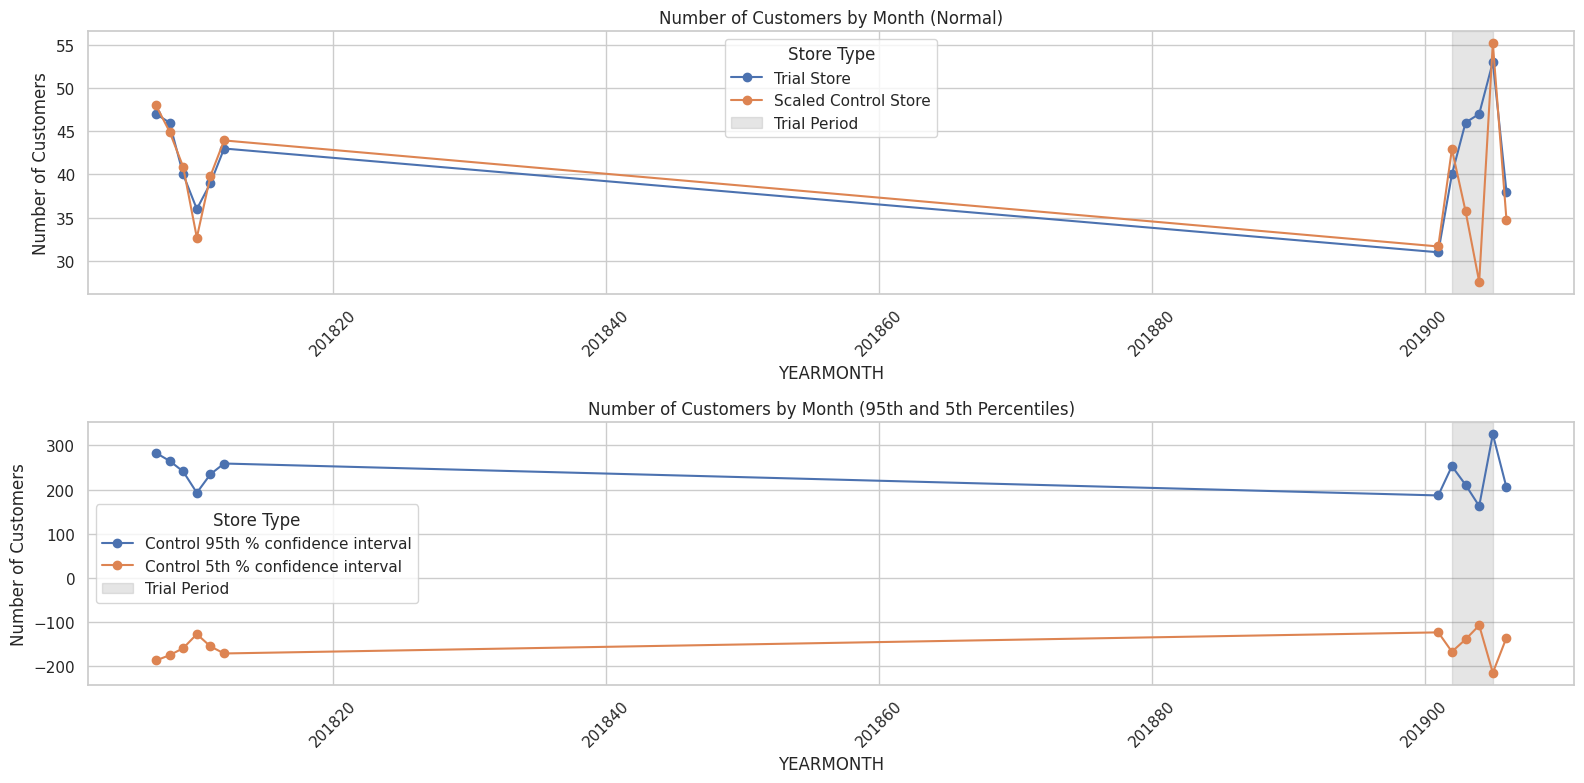

In [83]:
import matplotlib.pyplot as plt

# Prepare subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Plot the normal number of customers on the first subplot
axes[0].plot(num_customers_data['YEARMONTH'], num_customers_data['store_77_num_customers'], marker='o', label='Trial Store')
axes[0].plot(num_customers_data['YEARMONTH'], num_customers_data['store_233_num_customers'], marker='o', label='Scaled Control Store')

axes[0].axvspan(201902, 201905, color='grey', alpha=0.2, label='Trial Period')
axes[0].set_title('Number of Customers by Month (Normal)')
axes[0].set_xlabel('YEARMONTH')
axes[0].set_ylabel('Number of Customers')
axes[0].legend(title='Store Type')
axes[0].tick_params(axis='x', rotation=45)

# Plot the 95th and 5th percentiles on the second subplot
axes[1].plot(control_95th['YEARMONTH'], control_95th['store_233_num_customers'], marker='o', label='Control 95th % confidence interval')
axes[1].plot(control_5th['YEARMONTH'], control_5th['store_233_num_customers'], marker='o', label='Control 5th % confidence interval')

axes[1].axvspan(201902, 201905, color='grey', alpha=0.2, label='Trial Period')
axes[1].set_title('Number of Customers by Month (95th and 5th Percentiles)')
axes[1].set_xlabel('YEARMONTH')
axes[1].set_ylabel('Number of Customers')
axes[1].legend(title='Store Type')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


****
****

## Trial Store 86

In [84]:
store_86_corr_totsales = calculate_correlations(preTrialMeasures, 86, 'total_sales')
store_86_corr_ncustomers = calculate_correlations(preTrialMeasures, 86, 'num_customers')

store_86_smd_value = calculate_smd(preTrialMeasures, 'STORE_NBR', 'total_sales', treatment_store=86)
store_86 = store_86_corr_totsales.merge(store_86_smd_value, on=['store','control_store'], how='inner')
store_86 = store_86_corr_ncustomers.merge(store_86, on=['store','control_store'], how='inner')

store_86.sort_values(by=['correlation_num_customers','correlation_total_sales'],ascending=False,inplace=True)
store_86


,store,control_store,correlation_num_customers,correlation_total_sales,smd
106,86,114.0,0.855045,0.750924,0.000000
146,86,155.0,0.829086,0.869532,0.000000
211,86,225.0,0.787599,0.282581,0.034385
73,86,78.0,0.776887,0.437737,0.086804
167,86,176.0,0.756402,0.582468,0.608995
...,...,...,...,...,...
170,86,180.0,-0.726974,-0.048221,0.000927
203,86,216.0,-0.727595,0.251081,0.000000
59,86,63.0,-0.801173,-0.489735,0.000000
21,86,23.0,-0.899089,-0.558887,0.020197


**Store '155' is more likely to be suitable control store with average correlation of 85, while store '114' average correlation is 80**

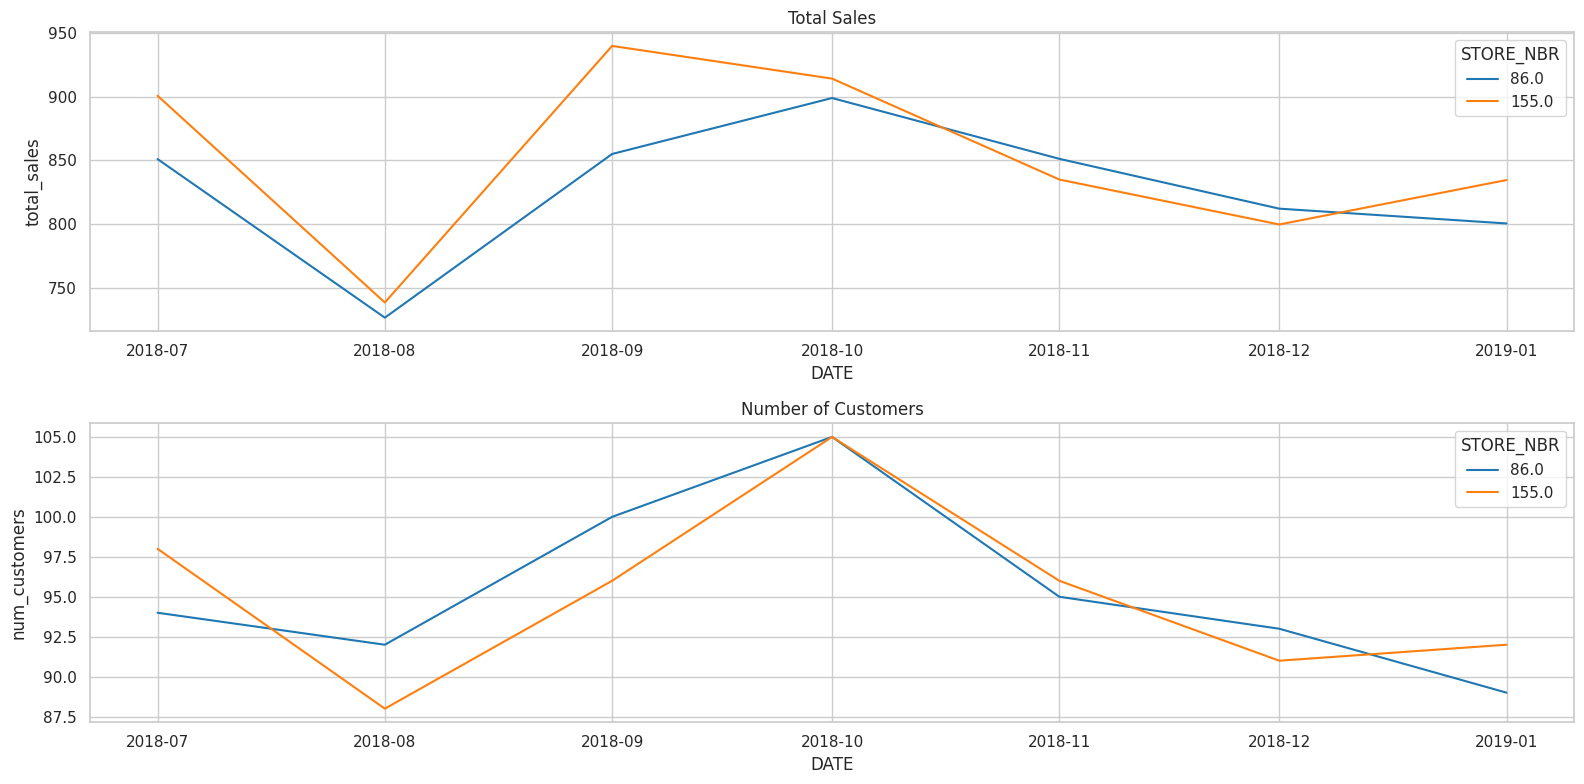

In [85]:
store_86_155 = preTrialMeasures[preTrialMeasures['STORE_NBR'].isin([86, 155])]

# Convert 'DATE' column from PeriodDtype to TimestampDtype
store_86_155['DATE'] = store_86_155['DATE'].dt.to_timestamp()

fig, axes = plt.subplots(2, 1, figsize=(16, 8))

sns.lineplot(data=store_86_155, x='DATE', y='total_sales', ax=axes[0], hue='STORE_NBR',palette='tab10')
sns.lineplot(data=store_86_155, x='DATE', y='num_customers', ax=axes[1], hue='STORE_NBR',palette='tab10')

axes[0].set_title('Total Sales')
axes[1].set_title('Number of Customers')

plt.tight_layout()
plt.show()


****

Text(0.5, 1.0, 'Number of Customers')

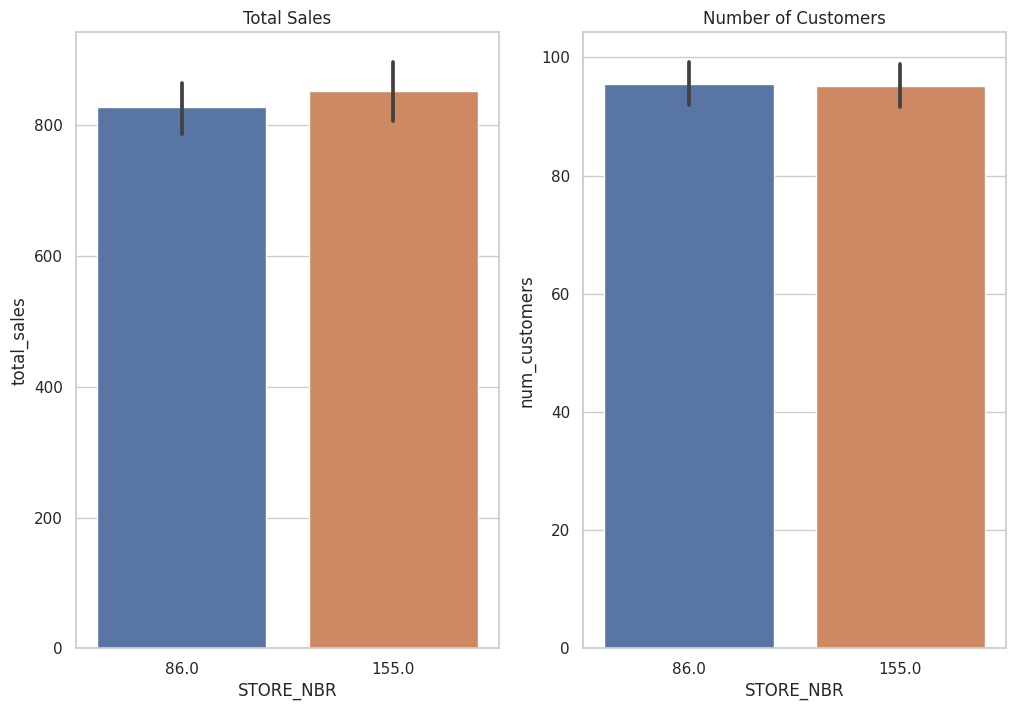

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

sns.barplot(store_86_155,x='STORE_NBR',y='total_sales',ax=axes[0])
sns.barplot(store_86_155,x='STORE_NBR',y='num_customers',ax=axes[1])
axes[0].set_title('Total Sales')
axes[1].set_title('Number of Customers')


****

### Scaling Factor for Total Sales

In [87]:
trial_store = 86
control_store = 155

# Filtering the pre-trial period
pre_trial_trial_store_sales = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trial_store) & 
                                               (preTrialMeasures['YEARMONTH'] < 201902)]['total_sales'].sum()
pre_trial_control_store_sales = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == control_store) & 
                                                 (preTrialMeasures['YEARMONTH'] < 201902)]['total_sales'].sum()

# Calculating the scaling factor
scaling_factor_for_control_sales = pre_trial_trial_store_sales / pre_trial_control_store_sales
scaling_factor_for_control_sales


0.9720493769183033

In [88]:
control_store_sales = measureOverTime.query('STORE_NBR == 155').filter(['YEARMONTH', 'total_sales'], axis=1)
control_store_sales.rename(columns={'total_sales': 'store_155_sales'}, inplace=True)

trial_store_sales = measureOverTime.query('STORE_NBR == 86').filter(['YEARMONTH', 'total_sales'], axis=1)
trial_store_sales.rename(columns={'total_sales': 'store_86_sales'}, inplace=True)

sales_data = control_store_sales.merge(trial_store_sales,on='YEARMONTH',how='inner')
# Applying Scaling Factor
sales_data['store_155_sales'] = sales_data['store_155_sales']*scaling_factor_for_control_sales

sales_data['pct_diff']=abs(((sales_data['store_155_sales']/sales_data['store_86_sales'])-1)*100)
sales_data['pct_diff'] = sales_data['pct_diff'].round(2)
sales_data


,YEARMONTH,store_155_sales,store_86_sales,pct_diff
0,201807,875.427669,851.00,2.87
1,201808,718.052875,726.85,1.21
2,201809,913.337595,855.00,6.82
3,201810,888.453131,898.80,1.15
4,201811,811.661230,851.20,4.65
5,201812,777.445092,812.20,4.28
6,201901,811.272410,800.60,1.33
7,201902,827.019610,872.80,5.25
8,201903,745.561872,945.40,21.14
9,201904,778.028321,804.00,3.23


In [89]:
pre_trial_sales_data= sales_data[sales_data['YEARMONTH'] <201902]
trial_sales_data= sales_data[sales_data['YEARMONTH'] >=201902]
print(f'''Standard Deviation of Percentage Difference in Pre-Trial Period: {pre_trial_sales_data['pct_diff'].std()},
While Standard Deviation of Percentage Difference in Trial Period: {trial_sales_data['pct_diff'].std()}''')


Standard Deviation of Percentage Difference in Pre-Trial Period: 2.1656616716815384,
While Standard Deviation of Percentage Difference in Trial Period: 8.066092610427928


In [90]:
from scipy.stats import t

# 1. Calculate the t-values for the trial months
trial_sales_data['t_value'] = (trial_sales_data['pct_diff'] - 0) / pre_trial_sales_data['pct_diff'].std()

# 2. Determine the 95th percentile of the t-distribution
degreesOfFreedom = 7
critical_value = t.ppf(0.95, df=degreesOfFreedom)

# 3. Check for statistical significance
trial_sales_data['is_significant'] = np.abs(trial_sales_data['t_value']) > critical_value

print(trial_sales_data[['YEARMONTH', 't_value', 'is_significant']])


    YEARMONTH   t_value  is_significant
7      201902  2.424201            True
8      201903  9.761451            True
9      201904  1.491461           False
10     201905  0.683394           False
11     201906  1.593047           False


****

In [91]:
# Create new variables in the DataFrame
trial_store = 86
control_store = 155

pastSales = measureOverTime[(measureOverTime['STORE_NBR'] == trial_store) | (measureOverTime['STORE_NBR'] == control_store)].copy()

# Assume stdDev is calculated based on some logic
stdDev = pastSales.groupby('STORE_NBR')['total_sales'].std().iloc[0]

# Control store 95th percentile
pastSales_Controls95 = pastSales[pastSales['STORE_NBR'] == control_store].copy()

pastSales_Controls95['total_sales'] = pastSales_Controls95['total_sales'] * (1 + stdDev * 2)
pastSales_Controls95['STORE_NBR'] = 155.95

# Control store 5th percentile
pastSales_Controls5 = pastSales[pastSales['STORE_NBR'] == control_store].copy()
pastSales_Controls5['total_sales'] = pastSales_Controls5['total_sales'] * (1 - stdDev * 2)
pastSales_Controls5['STORE_NBR'] = 155.05

# Combine the data
trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5])
trialAssessment.head()


,STORE_NBR,DATE,total_sales,num_customers,total_transactions,total_chips,transactions_per_customer,chips_per_customer,avg_price_per_unit,YEAR,MONTH,YEARMONTH
977,86.0,2018-07,851.00,94,120,239.0,1.276596,2.542553,3.560669,2018,7,201807
978,86.0,2018-08,726.85,92,106,203.0,1.152174,2.206522,3.580542,2018,8,201808
979,86.0,2018-09,855.00,100,121,242.0,1.210000,2.420000,3.533058,2018,9,201809
980,86.0,2018-10,898.80,105,130,260.0,1.238095,2.476190,3.456923,2018,10,201810
981,86.0,2018-11,851.20,95,119,238.0,1.252632,2.505263,3.576471,2018,11,201811


In [92]:
normal_sales_df = trialAssessment[trialAssessment['STORE_NBR'].isin([86.0, 155.0])]
percentile_sales_df= trialAssessment[~trialAssessment['STORE_NBR'].isin([86.0, 155.0])]

normal_sales_df['DATE'] = normal_sales_df['DATE'].dt.to_timestamp() 
percentile_sales_df['DATE'] = percentile_sales_df['DATE'].dt.to_timestamp()


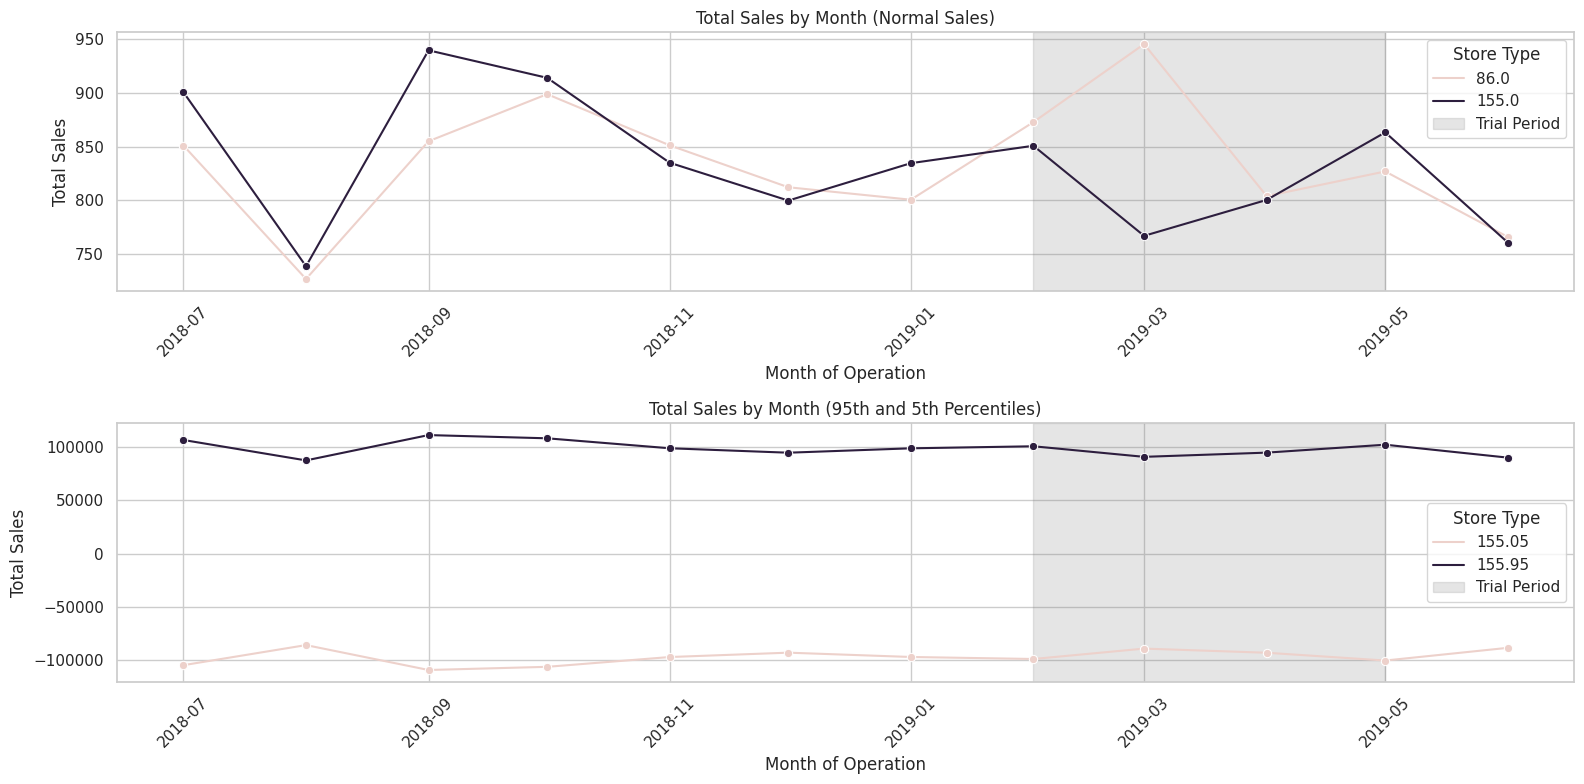

In [93]:
# Prepare the subplots
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Highlight the trial period
trial_period = (pd.to_datetime('201902', format='%Y%m'), pd.to_datetime('201905', format='%Y%m'))

# Plot the normal total sales on the first subplot
sns.lineplot(x='DATE', y='total_sales', hue='STORE_NBR', data=normal_sales_df, marker='o', ax=axes[0])
axes[0].axvspan(trial_period[0], trial_period[1], color='grey', alpha=0.2, label='Trial Period')
axes[0].set_title('Total Sales by Month (Normal Sales)')
axes[0].set_xlabel('Month of Operation')
axes[0].set_ylabel('Total Sales')
axes[0].legend(title='Store Type')
axes[0].tick_params(axis='x', rotation=45)

# Plot the 95th and 5th percentiles on the second subplot
sns.lineplot(x='DATE', y='total_sales', hue='STORE_NBR', data=percentile_sales_df, marker='o', ax=axes[1])
axes[1].axvspan(trial_period[0], trial_period[1], color='grey', alpha=0.2, label='Trial Period')
axes[1].set_title('Total Sales by Month (95th and 5th Percentiles)')
axes[1].set_xlabel('Month of Operation')
axes[1].set_ylabel('Total Sales')
axes[1].legend(title='Store Type')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


****

## Num Customers

In [94]:
control_store_num_customers = measureOverTime.query('STORE_NBR == 155').filter(['YEARMONTH', 'num_customers'], axis=1)
control_store_num_customers.rename(columns={'num_customers': 'store_155_num_customers'}, inplace=True)

# Filtering the pre-trial period
pre_trial_trial_store_num_customers = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trial_store) & 
                                               (preTrialMeasures['YEARMONTH'] < 201902)]['num_customers'].sum()
pre_trial_control_store_num_customers = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == control_store) & 
                                                 (preTrialMeasures['YEARMONTH'] < 201902)]['num_customers'].sum()

# Calculating the scaling factor
scaling_factor_for_num_customers = pre_trial_trial_store_num_customers / pre_trial_control_store_num_customers
scaling_factor_for_num_customers

trial_store_num_customers = measureOverTime.query('STORE_NBR == 86').filter(['YEARMONTH', 'num_customers'], axis=1)
trial_store_num_customers.rename(columns={'num_customers': 'store_86_num_customers'}, inplace=True)

num_customers_data = control_store_num_customers.merge(trial_store_num_customers,on='YEARMONTH',how='inner')
# Applying Scaling Factornum_customers
num_customers_data['store_155_num_customers'] =num_customers_data['store_155_num_customers']*scaling_factor_for_num_customers
num_customers_data['pct_diff']=abs(((num_customers_data['store_155_num_customers']/num_customers_data['store_86_num_customers'])-1)*100)
num_customers_data['pct_diff'] = num_customers_data['pct_diff'].round(2)
num_customers_data


,YEARMONTH,store_155_num_customers,store_86_num_customers,pct_diff
0,201807,98.294294,94,4.57
1,201808,88.264264,92,4.06
2,201809,96.288288,100,3.71
3,201810,105.315315,105,0.30
4,201811,96.288288,95,1.36
5,201812,91.273273,93,1.86
6,201901,92.276276,89,3.68
7,201902,92.276276,105,12.12
8,201903,91.273273,108,15.49
9,201904,93.279279,99,5.78


In [95]:
# Calculate standard deviation based on pre-trial percentage difference
std_dev = np.std(num_customers_data[num_customers_data['YEARMONTH'] < 201902]['pct_diff'])

# Define degrees of freedom (length of pre-trial period - 1)
degrees_of_freedom = len(num_customers_data[num_customers_data['YEARMONTH'] < 201902]) - 1

# Define trial period
trial_period_start = pd.to_datetime('2019-02-01')
trial_period_end = pd.to_datetime('2019-05-01')


In [96]:
# Compute 95th and 5th percentiles for control store
control_95th = num_customers_data.copy()
control_95th['store_155_num_customers'] = control_95th['store_155_num_customers'] * (1 + std_dev * 2)
control_95th['STORE_NBR'] = 'Control 95th % confidence interval'

control_5th = num_customers_data.copy()
control_5th['store_155_num_customers'] = control_5th['store_155_num_customers'] * (1 - std_dev * 2)
control_5th['STORE_NBR'] = 'Control 5th % confidence interval'

# Combine all data
trial_assessment = pd.concat([num_customers_data, control_95th, control_5th])


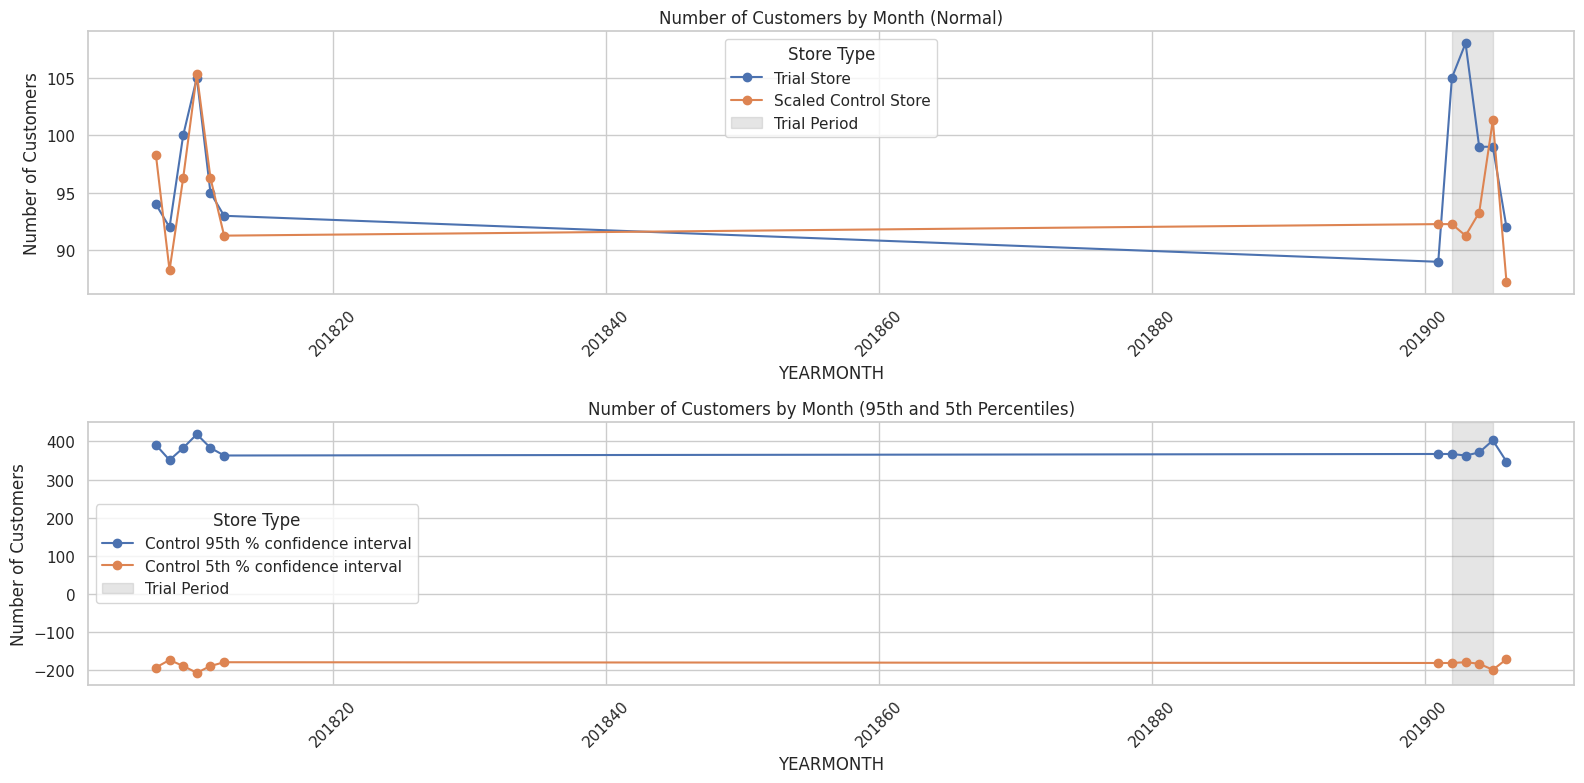

In [97]:
# Prepare subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Plot the normal number of customers on the first subplot
axes[0].plot(num_customers_data['YEARMONTH'], num_customers_data['store_86_num_customers'], marker='o', label='Trial Store')
axes[0].plot(num_customers_data['YEARMONTH'], num_customers_data['store_155_num_customers'], marker='o', label='Scaled Control Store')

axes[0].axvspan(201902, 201905, color='grey', alpha=0.2, label='Trial Period')
axes[0].set_title('Number of Customers by Month (Normal)')
axes[0].set_xlabel('YEARMONTH')
axes[0].set_ylabel('Number of Customers')
axes[0].legend(title='Store Type')
axes[0].tick_params(axis='x', rotation=45)

# Plot the 95th and 5th percentiles on the second subplot
axes[1].plot(control_95th['YEARMONTH'], control_95th['store_155_num_customers'], marker='o', label='Control 95th % confidence interval')
axes[1].plot(control_5th['YEARMONTH'], control_5th['store_155_num_customers'], marker='o', label='Control 5th % confidence interval')

axes[1].axvspan(201902, 201905, color='grey', alpha=0.2, label='Trial Period')
axes[1].set_title('Number of Customers by Month (95th and 5th Percentiles)')
axes[1].set_xlabel('YEARMONTH')
axes[1].set_ylabel('Number of Customers')
axes[1].legend(title='Store Type')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


****

## Store 88

In [98]:
store_88_corr_totsales = calculate_correlations(preTrialMeasures, 88, 'total_sales')
store_88_corr_ncustomers = calculate_correlations(preTrialMeasures, 88, 'num_customers')

store_88_smd_value = calculate_smd(preTrialMeasures, 'STORE_NBR', 'total_sales', treatment_store=88)
store_88 = store_88_corr_totsales.merge(store_88_smd_value, on=['store','control_store'], how='inner')
store_88 = store_88_corr_ncustomers.merge(store_88, on=['store','control_store'], how='inner')

store_88.sort_values(by=['correlation_num_customers','correlation_total_sales'],ascending=False,inplace=True)
store_88


,store,control_store,correlation_num_customers,correlation_total_sales,smd
12,88,14.0,0.967364,0.479135,0.967976
223,88,237.0,0.958896,0.109878,0.000000
168,88,178.0,0.908365,0.202599,0.226564
72,88,77.0,0.863736,-0.308587,0.733602
53,88,57.0,0.792889,-0.377006,0.236208
...,...,...,...,...,...
197,88,209.0,-0.707673,-0.414207,0.230442
45,88,49.0,-0.712142,-0.079323,0.094259
243,88,258.0,-0.729332,0.180923,0.981548
196,88,208.0,-0.807926,0.206796,0.332556


**Store '14' Has average correlation of 0.72 but smd value is very high, while store '237''s average correlation is 0.53 but smd value is 0, which is more suitable for control store**

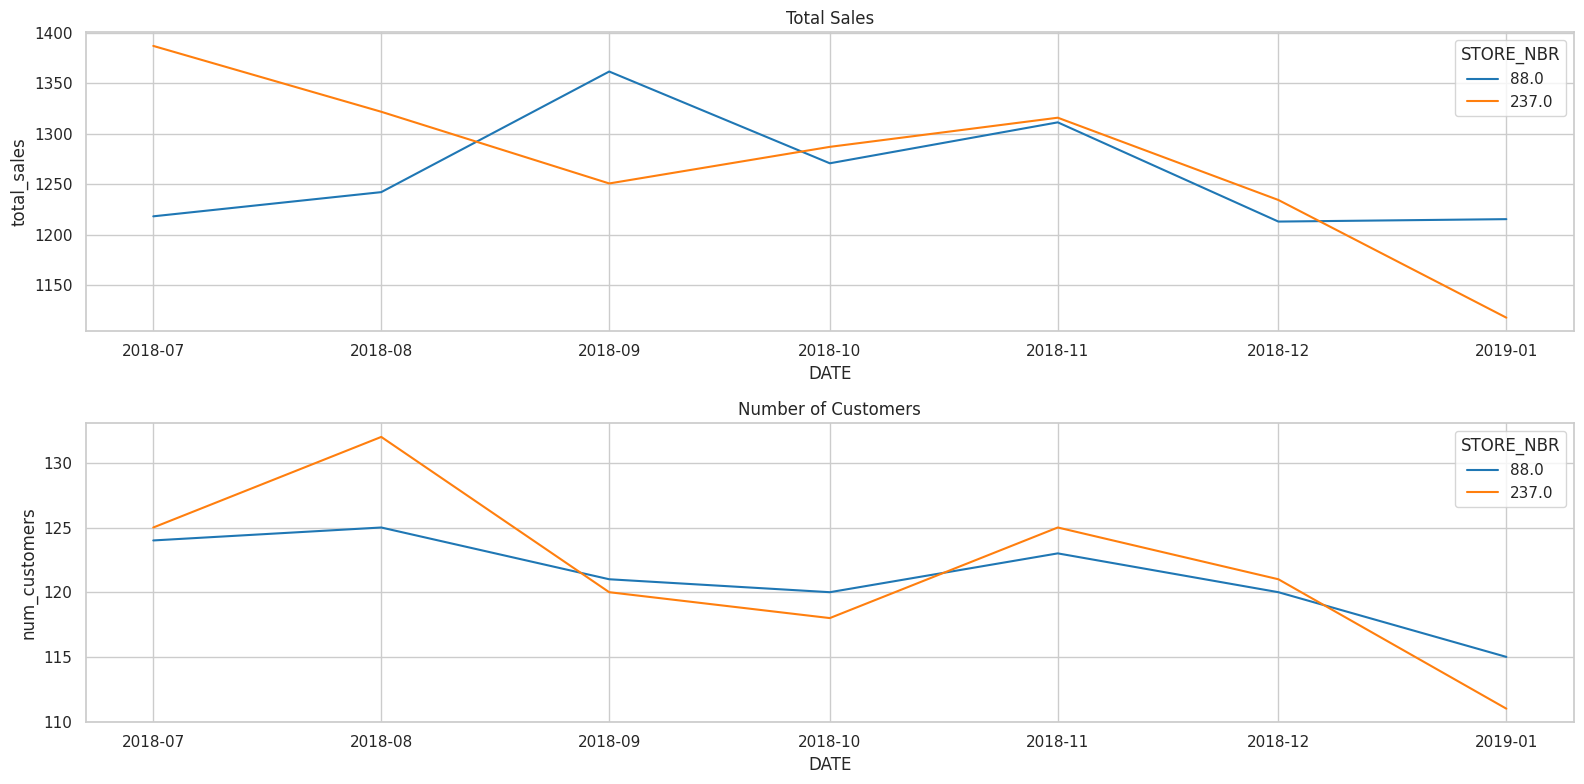

In [99]:
store_88_237 = preTrialMeasures[preTrialMeasures['STORE_NBR'].isin([88, 237])]

# Convert 'DATE' column from PeriodDtype to TimestampDtype
store_88_237['DATE'] = store_88_237['DATE'].dt.to_timestamp()

fig, axes = plt.subplots(2, 1, figsize=(16, 8))

sns.lineplot(data=store_88_237, x='DATE', y='total_sales', ax=axes[0], hue='STORE_NBR',palette='tab10')
sns.lineplot(data=store_88_237, x='DATE', y='num_customers', ax=axes[1], hue='STORE_NBR',palette='tab10')

axes[0].set_title('Total Sales')
axes[1].set_title('Number of Customers')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Number of Customers')

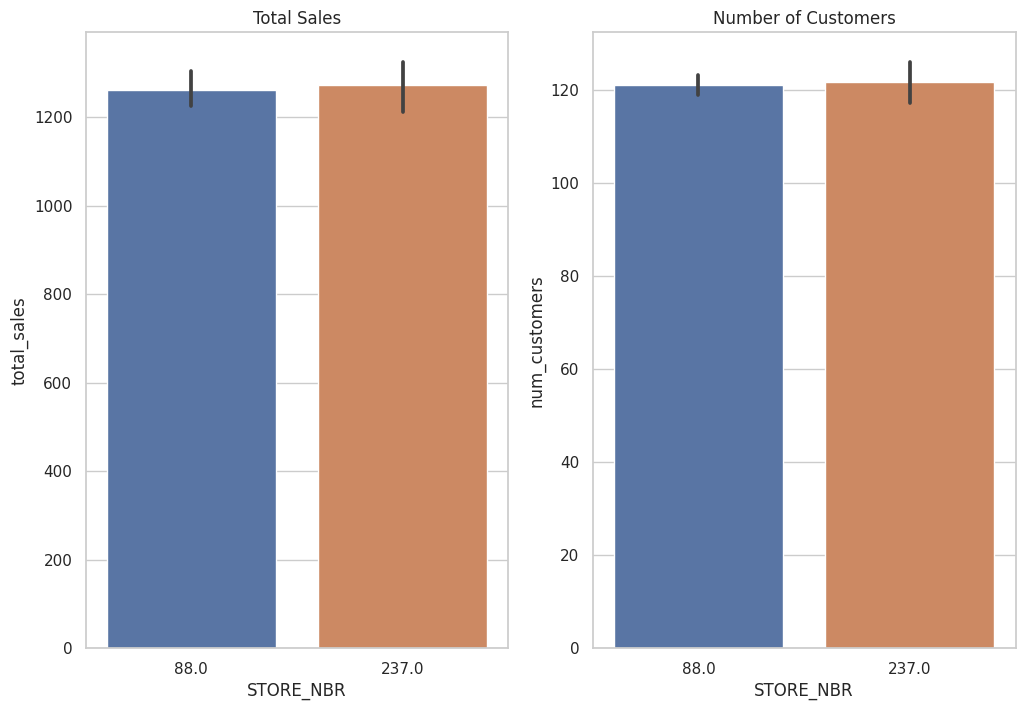

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

sns.barplot(store_88_237,x='STORE_NBR',y='total_sales',ax=axes[0])
sns.barplot(store_88_237,x='STORE_NBR',y='num_customers',ax=axes[1])
axes[0].set_title('Total Sales')
axes[1].set_title('Number of Customers')


****

## Scaling Factor

In [101]:
trial_store = 88
control_store = 237

# Filtering the pre-trial period
pre_trial_trial_store_sales = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trial_store) & 
                                               (preTrialMeasures['YEARMONTH'] < 201902)]['total_sales'].sum()
pre_trial_control_store_sales = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == control_store) & 
                                                 (preTrialMeasures['YEARMONTH'] < 201902)]['total_sales'].sum()

# Calculating the scaling factor
scaling_factor_for_control_sales = pre_trial_trial_store_sales / pre_trial_control_store_sales
scaling_factor_for_control_sales


0.9907684714697534

In [102]:
control_store_sales = measureOverTime.query('STORE_NBR == 237').filter(['YEARMONTH', 'total_sales'], axis=1)
control_store_sales.rename(columns={'total_sales': 'store_237_sales'}, inplace=True)

trial_store_sales = measureOverTime.query('STORE_NBR == 88').filter(['YEARMONTH', 'total_sales'], axis=1)
trial_store_sales.rename(columns={'total_sales': 'store_88_sales'}, inplace=True)

sales_data = control_store_sales.merge(trial_store_sales,on='YEARMONTH',how='inner')
# Applying Scaling Factor
sales_data['store_237_sales'] = sales_data['store_237_sales']*scaling_factor_for_control_sales


In [103]:

sales_data['pct_diff']=abs(((sales_data['store_237_sales']/sales_data['store_88_sales'])-1)*100)
sales_data['pct_diff'] = sales_data['pct_diff'].round(2)
sales_data


,YEARMONTH,store_237_sales,store_88_sales,pct_diff
0,201807,1374.394024,1218.20,12.82
1,201808,1309.696842,1242.20,5.43
2,201809,1239.253204,1361.80,9.00
3,201810,1275.218100,1270.80,0.35
4,201811,1303.851308,1311.40,0.58
5,201812,1223.004601,1213.00,0.82
6,201901,1107.381921,1215.40,8.89
7,201902,1300.879003,1339.60,2.89
8,201903,1166.728952,1467.00,20.47
9,201904,1142.950509,1317.00,13.22


In [104]:
pre_trial_sales_data= sales_data[sales_data['YEARMONTH'] <201902]
trial_sales_data= sales_data[sales_data['YEARMONTH'] >=201902]
print(f'''Standard Deviation of Percentage Difference in Pre-Trial Period: {pre_trial_sales_data['pct_diff'].std()},
While Standard Deviation of Percentage Difference in Trial Period: {trial_sales_data['pct_diff'].std()}''')


Standard Deviation of Percentage Difference in Pre-Trial Period: 4.998458810092415,
While Standard Deviation of Percentage Difference in Trial Period: 6.406104120290271


### T-Stat

In [105]:
from scipy.stats import t

# 1. Calculate the t-values for the trial months
trial_sales_data['t_value'] = (trial_sales_data['pct_diff'] - 0) / pre_trial_sales_data['pct_diff'].std()

# 2. Determine the 95th percentile of the t-distribution
degreesOfFreedom = 7
critical_value = t.ppf(0.95, df=degreesOfFreedom)

# 3. Check for statistical significance
trial_sales_data['is_significant'] = np.abs(trial_sales_data['t_value']) > critical_value

print(trial_sales_data[['YEARMONTH', 't_value', 'is_significant']])


    YEARMONTH   t_value  is_significant
7      201902  0.578178           False
8      201903  4.095262            True
9      201904  2.644815            True
10     201905  1.930595            True
11     201906  1.912590            True


### Percentiles

In [106]:
# Create new variables in the DataFrame
trial_store = 88
control_store = 237

pastSales = measureOverTime[(measureOverTime['STORE_NBR'] == trial_store) | (measureOverTime['STORE_NBR'] == control_store)].copy()

# Assume stdDev is calculated based on some logic
stdDev = pastSales.groupby('STORE_NBR')['total_sales'].std().iloc[0]

# Control store 95th percentile
pastSales_Controls95 = pastSales[pastSales['STORE_NBR'] == control_store].copy()

pastSales_Controls95['total_sales'] = pastSales_Controls95['total_sales'] * (1 + stdDev * 2)
pastSales_Controls95['STORE_NBR'] = 237.95

# Control store 5th percentile
pastSales_Controls5 = pastSales[pastSales['STORE_NBR'] == control_store].copy()
pastSales_Controls5['total_sales'] = pastSales_Controls5['total_sales'] * (1 - stdDev * 2)
pastSales_Controls5['STORE_NBR'] = 237.05

# Combine the data
trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5])
trialAssessment.head()


,STORE_NBR,DATE,total_sales,num_customers,total_transactions,total_chips,transactions_per_customer,chips_per_customer,avg_price_per_unit,YEAR,MONTH,YEARMONTH
1001,88.0,2018-07,1218.2,124,144,288.0,1.161290,2.322581,4.229861,2018,7,201807
1002,88.0,2018-08,1242.2,125,152,287.0,1.216000,2.296000,4.328223,2018,8,201808
1003,88.0,2018-09,1361.8,121,153,306.0,1.264463,2.528926,4.450327,2018,9,201809
1004,88.0,2018-10,1270.8,120,150,300.0,1.250000,2.500000,4.236000,2018,10,201810
1005,88.0,2018-11,1311.4,123,150,300.0,1.219512,2.439024,4.371333,2018,11,201811


In [107]:
normal_sales_df = trialAssessment[trialAssessment['STORE_NBR'].isin([88.0, 237.0])]
percentile_sales_df= trialAssessment[~trialAssessment['STORE_NBR'].isin([88.0, 237.0])]

normal_sales_df['DATE'] = normal_sales_df['DATE'].dt.to_timestamp() 
percentile_sales_df['DATE'] = percentile_sales_df['DATE'].dt.to_timestamp()


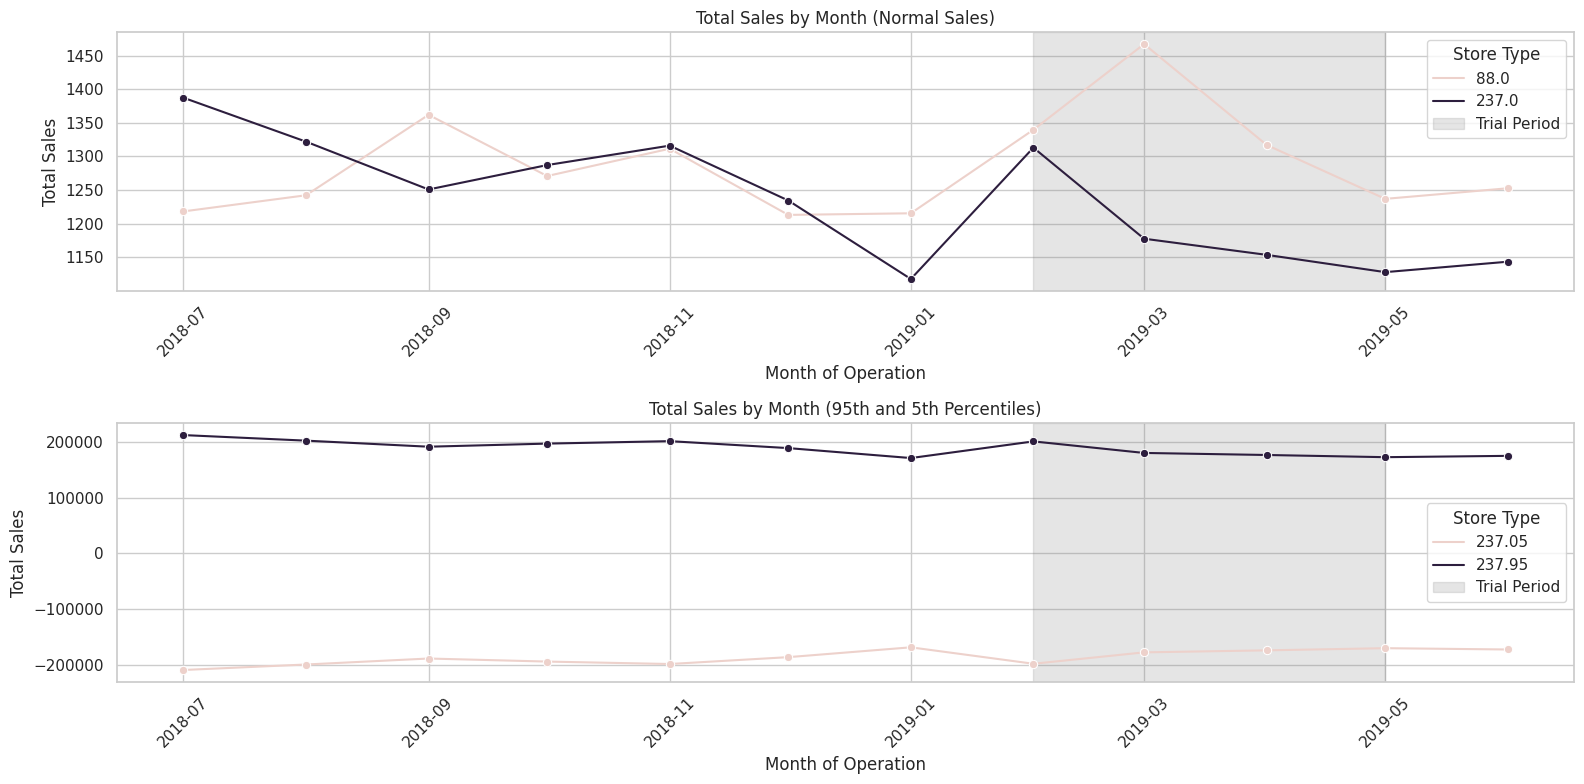

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the subplots
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Highlight the trial period
trial_period = (pd.to_datetime('201902', format='%Y%m'), pd.to_datetime('201905', format='%Y%m'))

# Plot the normal total sales on the first subplot
sns.lineplot(x='DATE', y='total_sales', hue='STORE_NBR', data=normal_sales_df, marker='o', ax=axes[0])
axes[0].axvspan(trial_period[0], trial_period[1], color='grey', alpha=0.2, label='Trial Period')
axes[0].set_title('Total Sales by Month (Normal Sales)')
axes[0].set_xlabel('Month of Operation')
axes[0].set_ylabel('Total Sales')
axes[0].legend(title='Store Type')
axes[0].tick_params(axis='x', rotation=45)

# Plot the 95th and 5th percentiles on the second subplot
sns.lineplot(x='DATE', y='total_sales', hue='STORE_NBR', data=percentile_sales_df, marker='o', ax=axes[1])
axes[1].axvspan(trial_period[0], trial_period[1], color='grey', alpha=0.2, label='Trial Period')
axes[1].set_title('Total Sales by Month (95th and 5th Percentiles)')
axes[1].set_xlabel('Month of Operation')
axes[1].set_ylabel('Total Sales')
axes[1].legend(title='Store Type')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Num Of Customers

In [109]:
control_store_num_customers = measureOverTime.query('STORE_NBR == 237').filter(['YEARMONTH', 'num_customers'], axis=1)
control_store_num_customers.rename(columns={'num_customers': 'store_237_num_customers'}, inplace=True)

# Filtering the pre-trial period
pre_trial_trial_store_num_customers = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trial_store) & 
                                               (preTrialMeasures['YEARMONTH'] < 201902)]['num_customers'].sum()
pre_trial_control_store_num_customers = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == control_store) & 
                                                 (preTrialMeasures['YEARMONTH'] < 201902)]['num_customers'].sum()

# Calculating the scaling factor
scaling_factor_for_num_customers = pre_trial_trial_store_num_customers / pre_trial_control_store_num_customers
scaling_factor_for_num_customers

trial_store_num_customers = measureOverTime.query('STORE_NBR == 88').filter(['YEARMONTH', 'num_customers'], axis=1)
trial_store_num_customers.rename(columns={'num_customers': 'store_88_num_customers'}, inplace=True)

num_customers_data = control_store_num_customers.merge(trial_store_num_customers,on='YEARMONTH',how='inner')
# Applying Scaling Factornum_customers
num_customers_data['store_237_num_customers'] =num_customers_data['store_237_num_customers']*scaling_factor_for_num_customers
num_customers_data['pct_diff']=abs(((num_customers_data['store_237_num_customers']/num_customers_data['store_88_num_customers'])-1)*100)
num_customers_data['pct_diff'] = num_customers_data['pct_diff'].round(2)
num_customers_data


,YEARMONTH,store_237_num_customers,store_88_num_customers,pct_diff
0,201807,124.413146,124,0.33
1,201808,131.380282,125,5.10
2,201809,119.436620,121,1.29
3,201810,117.446009,120,2.13
4,201811,124.413146,123,1.15
5,201812,120.431925,120,0.36
6,201901,110.478873,115,3.93
7,201902,118.441315,122,2.92
8,201903,115.455399,133,13.19
9,201904,115.455399,119,2.98


In [110]:
# Calculate standard deviation based on pre-trial percentage difference
std_dev = np.std(num_customers_data[num_customers_data['YEARMONTH'] < 201902]['pct_diff'])

# Define degrees of freedom (length of pre-trial period - 1)
degrees_of_freedom = len(num_customers_data[num_customers_data['YEARMONTH'] < 201902]) - 1

# Define trial period
trial_period_start = pd.to_datetime('2019-02-01')
trial_period_end = pd.to_datetime('2019-05-01')


In [111]:
# Compute 95th and 5th percentiles for control store
control_95th = num_customers_data.copy()
control_95th['store_237_num_customers'] = control_95th['store_237_num_customers'] * (1 + std_dev * 2)
control_95th['STORE_NBR'] = 'Control 95th % confidence interval'

control_5th = num_customers_data.copy()
control_5th['store_237_num_customers'] = control_5th['store_237_num_customers'] * (1 - std_dev * 2)
control_5th['STORE_NBR'] = 'Control 5th % confidence interval'

# Combine all data
trial_assessment = pd.concat([num_customers_data, control_95th, control_5th])


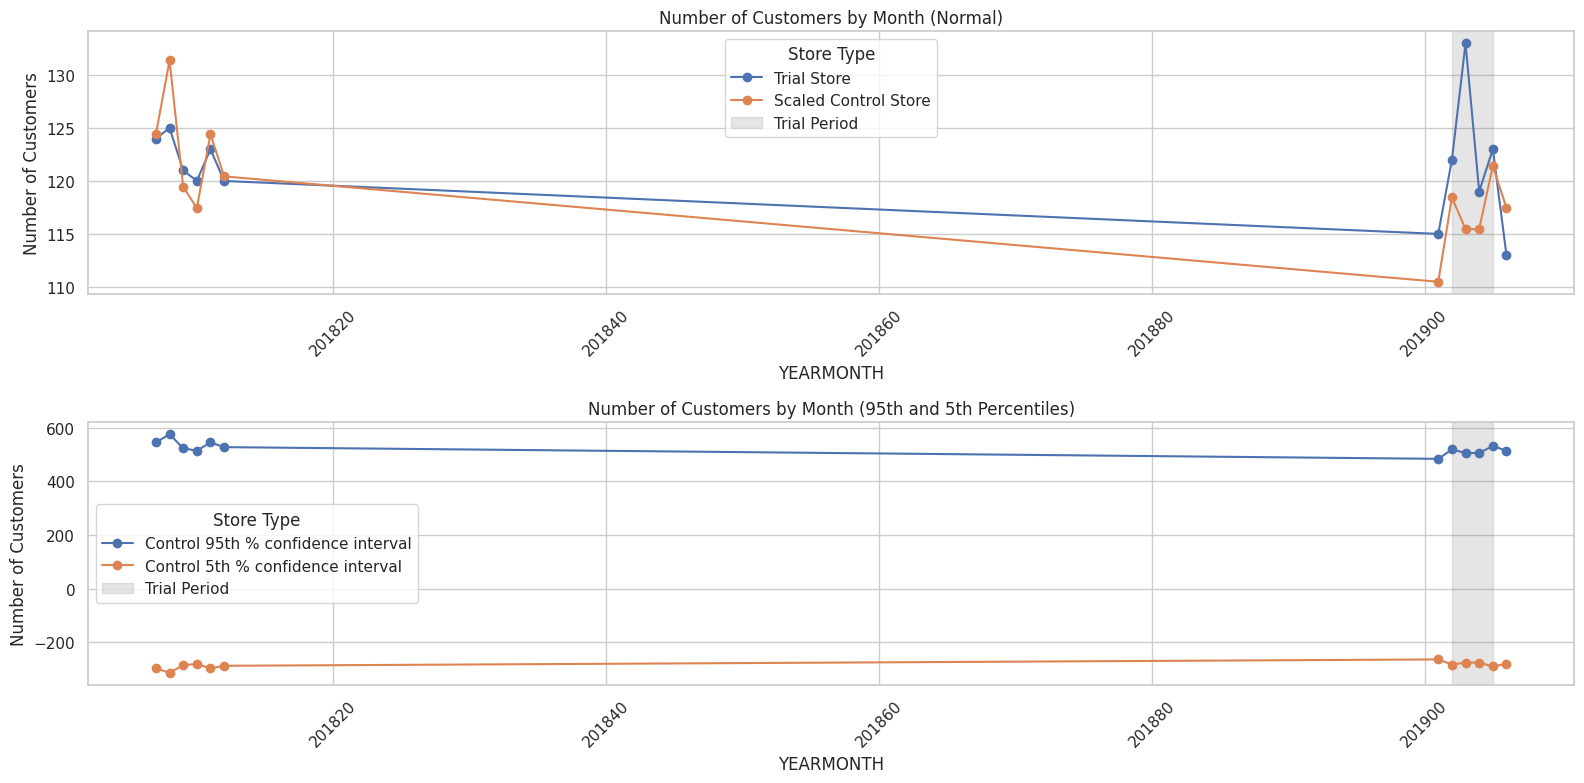

In [112]:
# Prepare subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Plot the normal number of customers on the first subplot
axes[0].plot(num_customers_data['YEARMONTH'], num_customers_data['store_88_num_customers'], marker='o', label='Trial Store')
axes[0].plot(num_customers_data['YEARMONTH'], num_customers_data['store_237_num_customers'], marker='o', label='Scaled Control Store')

axes[0].axvspan(201902, 201905, color='grey', alpha=0.2, label='Trial Period')
axes[0].set_title('Number of Customers by Month (Normal)')
axes[0].set_xlabel('YEARMONTH')
axes[0].set_ylabel('Number of Customers')
axes[0].legend(title='Store Type')
axes[0].tick_params(axis='x', rotation=45)

# Plot the 95th and 5th percentiles on the second subplot
axes[1].plot(control_95th['YEARMONTH'], control_95th['store_237_num_customers'], marker='o', label='Control 95th % confidence interval')
axes[1].plot(control_5th['YEARMONTH'], control_5th['store_237_num_customers'], marker='o', label='Control 5th % confidence interval')

axes[1].axvspan(201902, 201905, color='grey', alpha=0.2, label='Trial Period')
axes[1].set_title('Number of Customers by Month (95th and 5th Percentiles)')
axes[1].set_xlabel('YEARMONTH')
axes[1].set_ylabel('Number of Customers')
axes[1].legend(title='Store Type')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



**Total number of customers in the trial period for the trial store is significantlyhigher than the control store for two out of three months, which indicates apositive trial effect.**


****
****

## Conclusion

**We've found control stores 233, 155, 237 for trial stores 77, 86 and 88 respectively.**

**The results for trial stores 77 and 88 during the trial period show a significantdifference in at least two of the three trial months but this is not the case for trial store 86.**

**We can check with the client if the implementation of the trial was different in trial store 86 but overall, the trial shows a significant increase insales.**

**Now that we have finished our analysis, we can prepare our presentation tothe Category Manager.**


## ****
****